In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import sklearn
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Automobile_insurance_fraud.csv')
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [3]:
df.shape

(1000, 40)

In [4]:
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [5]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

# Summary Statistics

In [7]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


Observations :-
    
1. The mean is more than median for months_as_customer, age, policy_number, policy_deductable, umbrella_limit, insured_zip,
capital-gains, number_of_vehicles_involved, witnesses, injury_claim, property_claim and auto_year.

2. There is large difference between 75 % and maximum for policy_number, capital-gains, insured_zip, total_claim_amount	,
injury_claim, property_claim and vehicle_claim.

# Exploring Target Variable

In [8]:
df['fraud_reported'].value_counts()

N    753
Y    247
Name: fraud_reported, dtype: int64

In [9]:
((1000-247)/1000)*100

75.3

This is ac class imbalance problem.

# Univariate Analysis

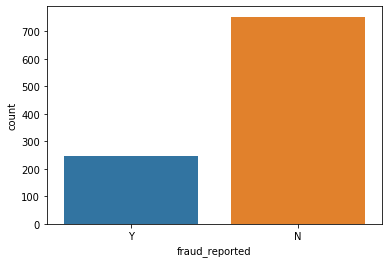

In [10]:
sns.countplot(df['fraud_reported'])

Observations :-
    
1. Fraud reported cases are only a few in the dataset.

# Data Visualizations

To check missing values

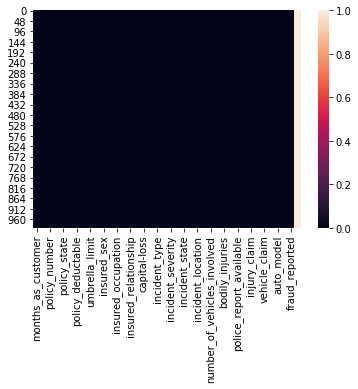

In [11]:
sns.heatmap(df.isnull())

Obsevations :-

1. The dataset has no missing values.

# Univariate Analysis

In [12]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [13]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [14]:
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [15]:
df_str_types=[]
for i in df.columns:
    if df[i].dtypes == "object":
        df_str_types.append(i)

In [16]:
df_str_types.remove('incident_date')

In [17]:
df_str_types.remove('policy_bind_date')

In [18]:
df_str_types.remove('incident_location')

In [19]:
df_str_types.remove('fraud_reported')

In [20]:
df['auto_model'].value_counts()

RAM               43
Wrangler          42
A3                37
Neon              37
MDX               36
Jetta             35
Passat            33
Legacy            32
A5                32
Pathfinder        31
Malibu            30
Camry             28
92x               28
Forrestor         28
E400              27
F150              27
95                27
93                25
Grand Cherokee    25
Maxima            24
Escape            24
Tahoe             24
Ultima            23
X5                23
Silverado         22
Civic             22
Highlander        22
Fusion            21
CRV               20
ML350             20
Corolla           20
TL                20
Impreza           20
C300              18
3 Series          18
X6                16
M5                15
Accord            13
RSX               12
Name: auto_model, dtype: int64

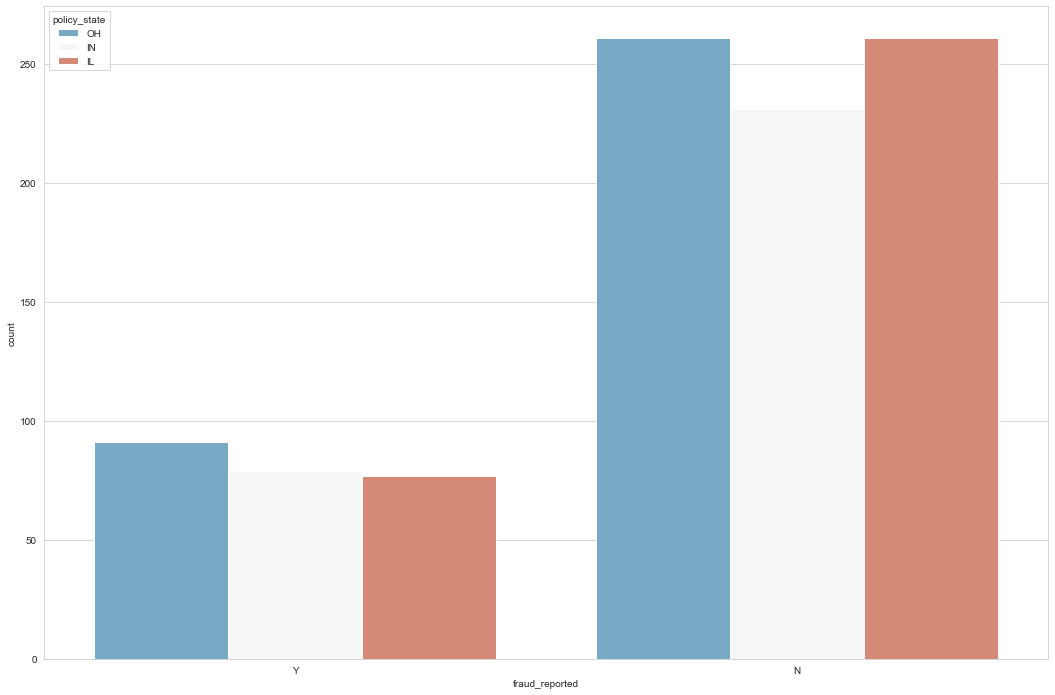

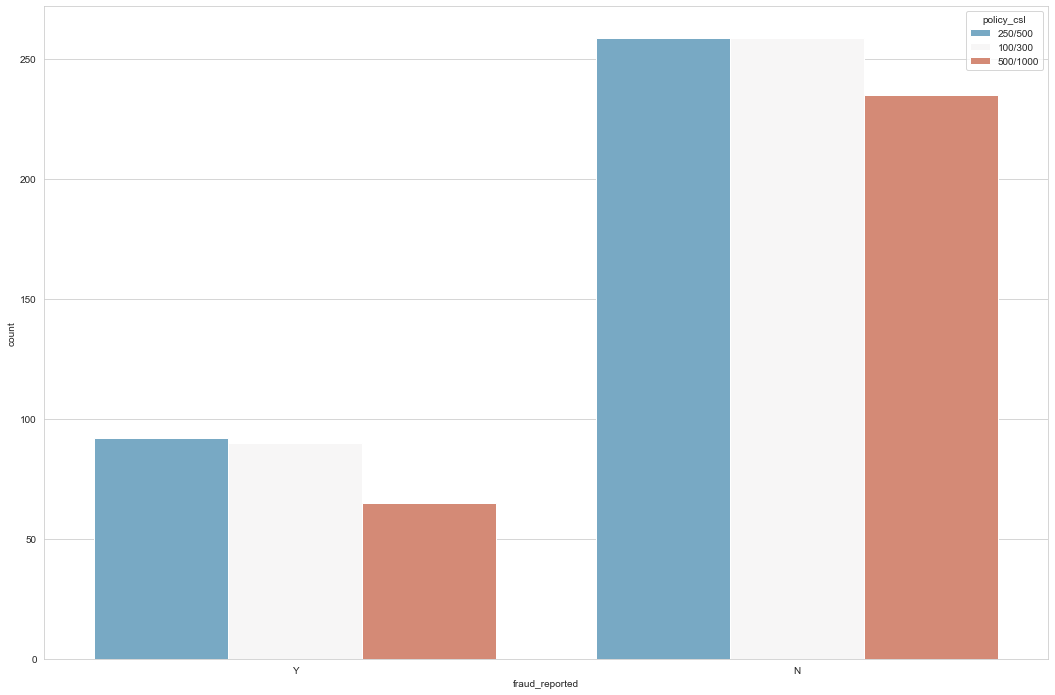

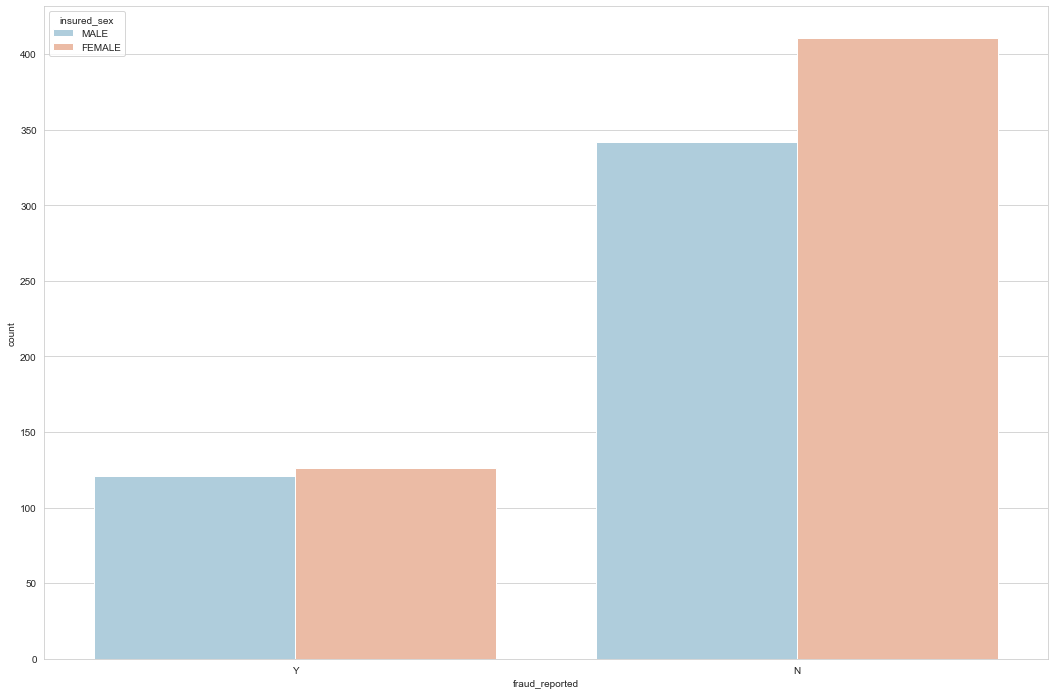

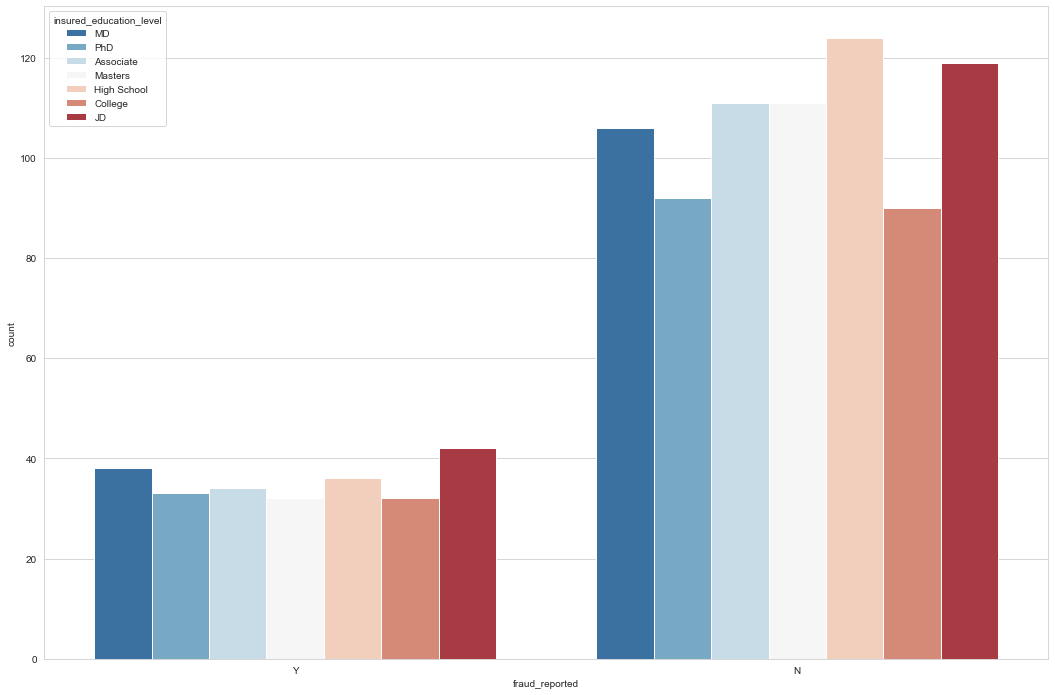

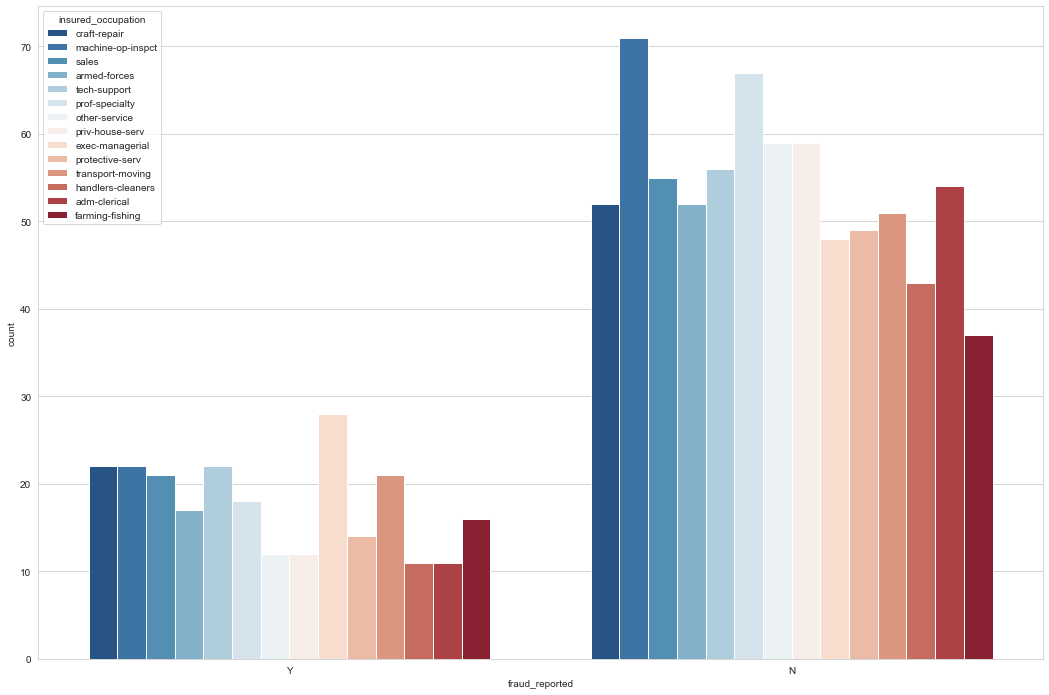

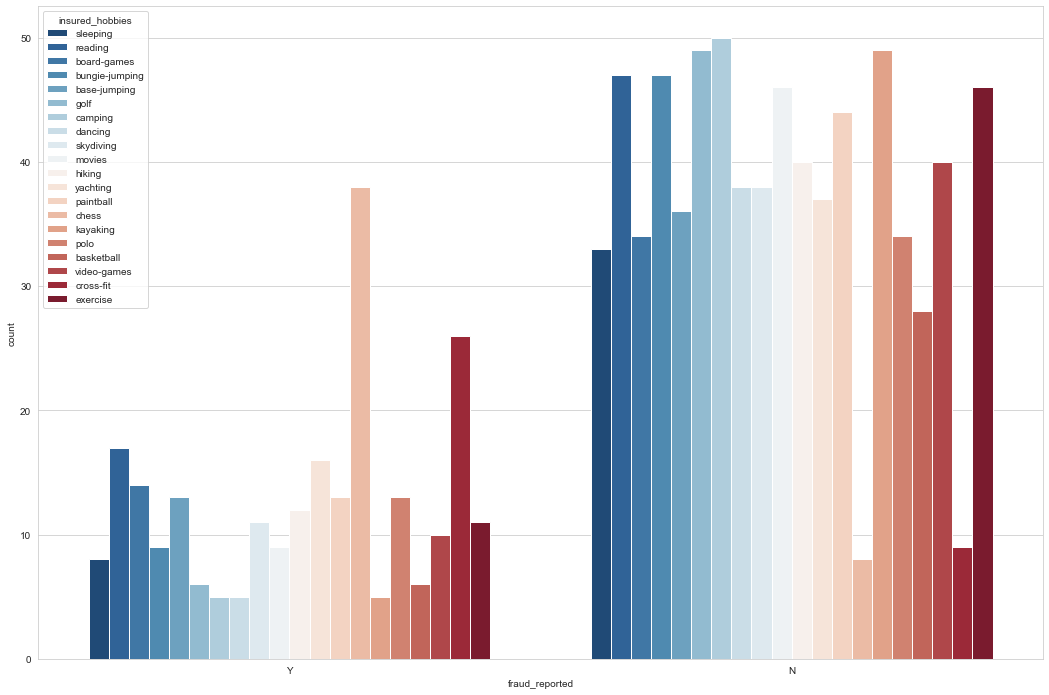

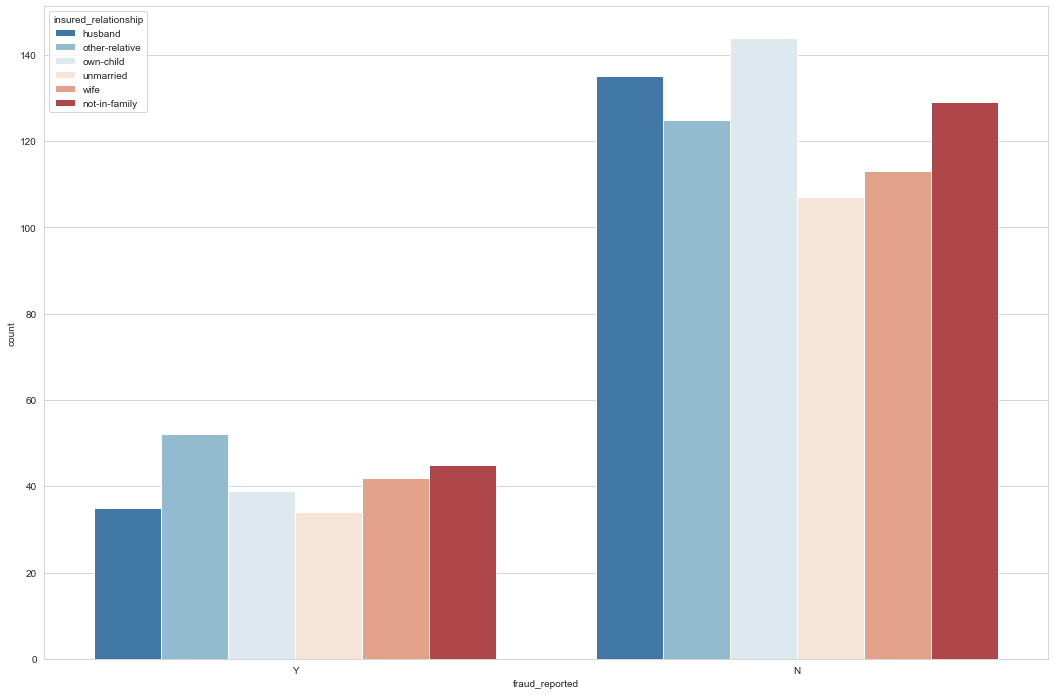

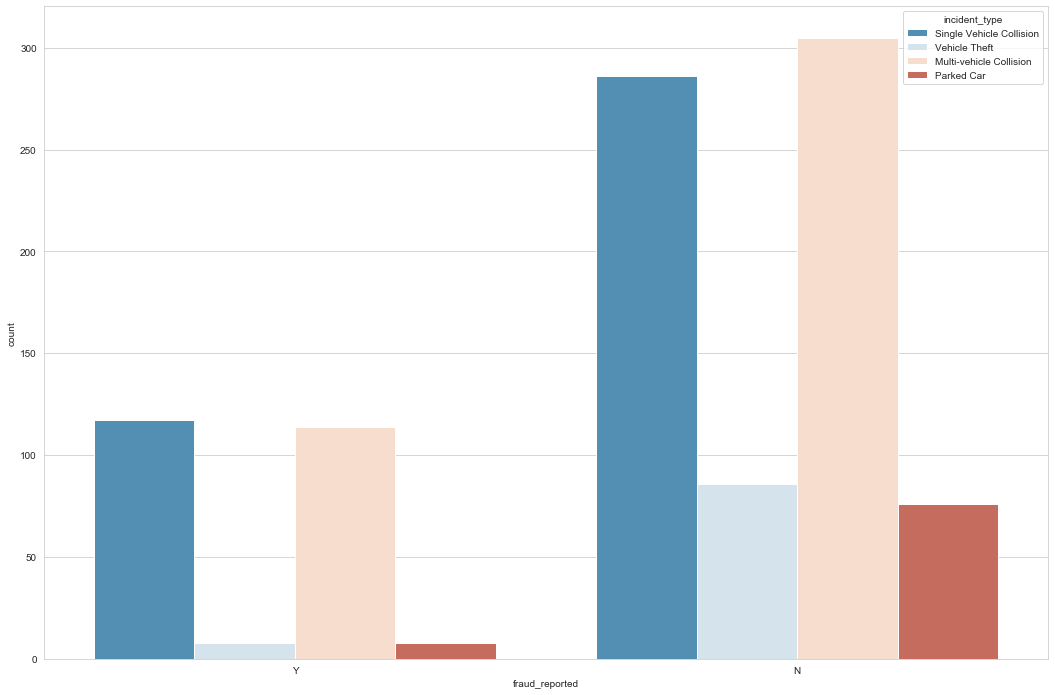

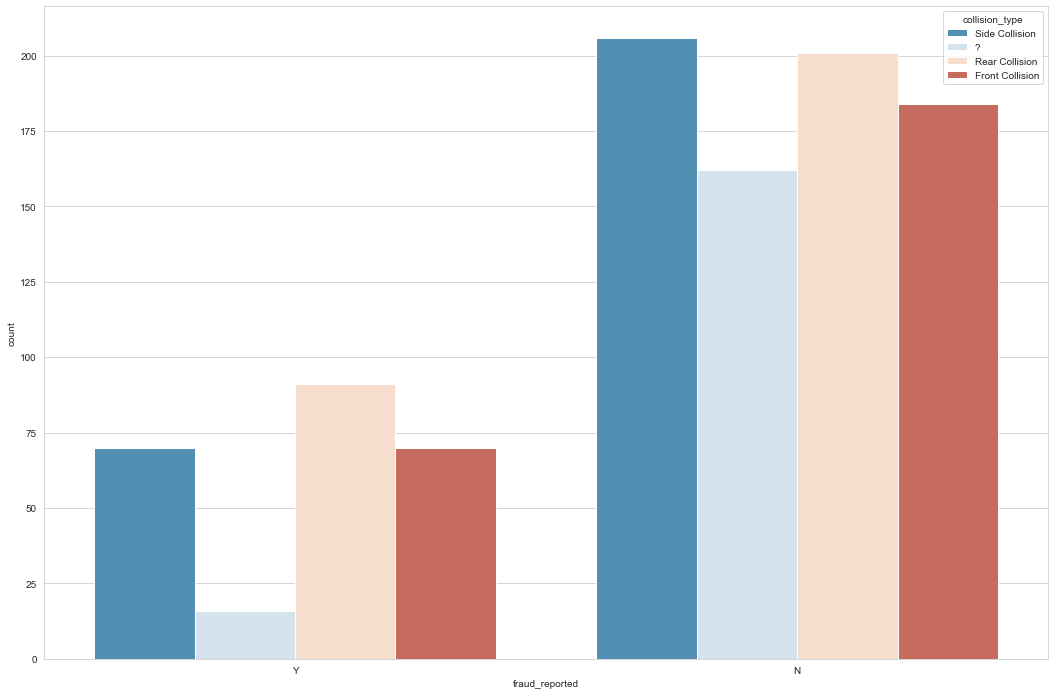

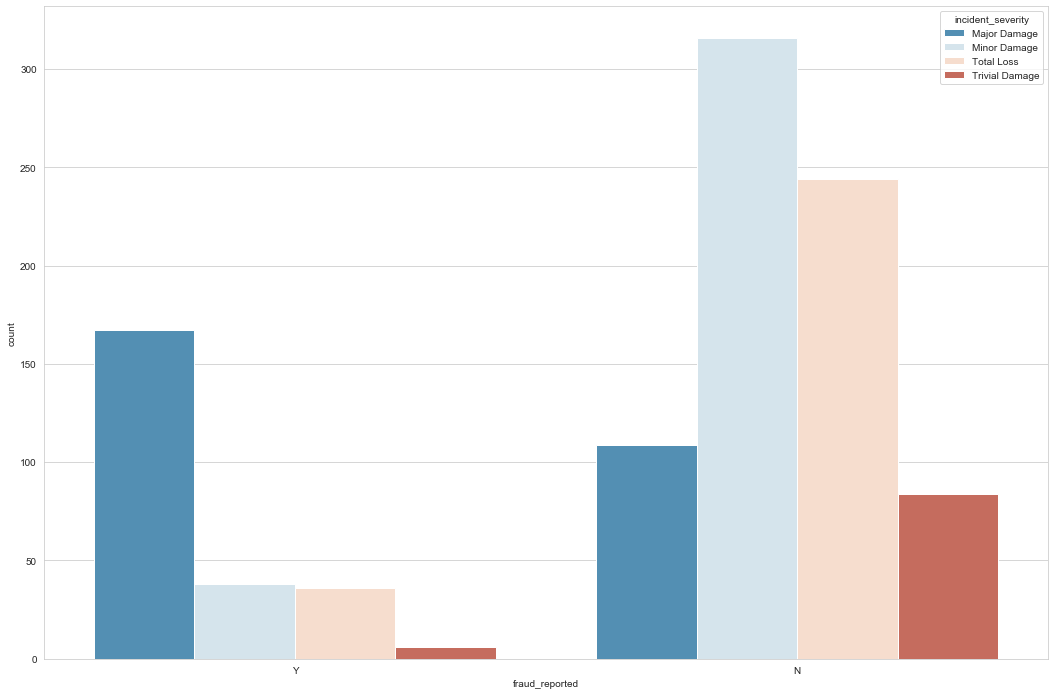

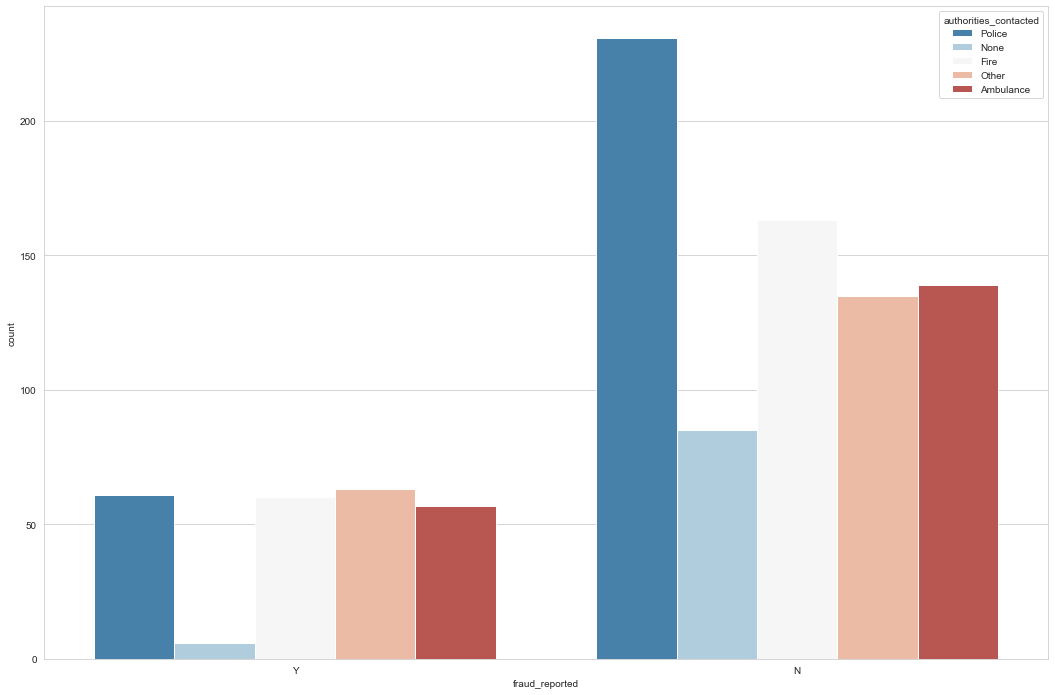

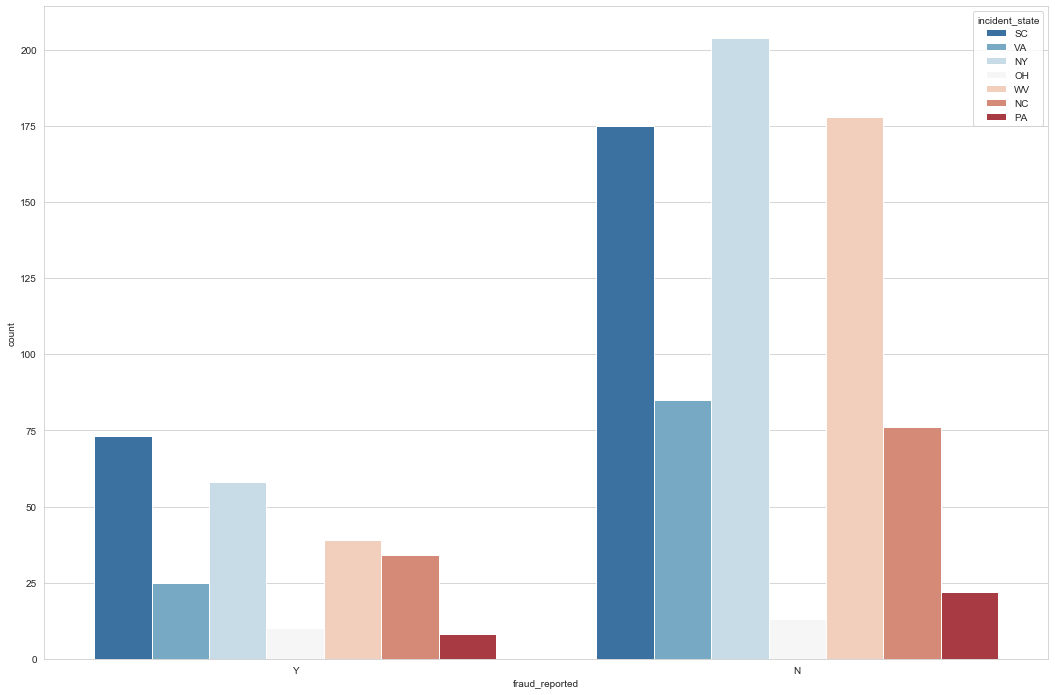

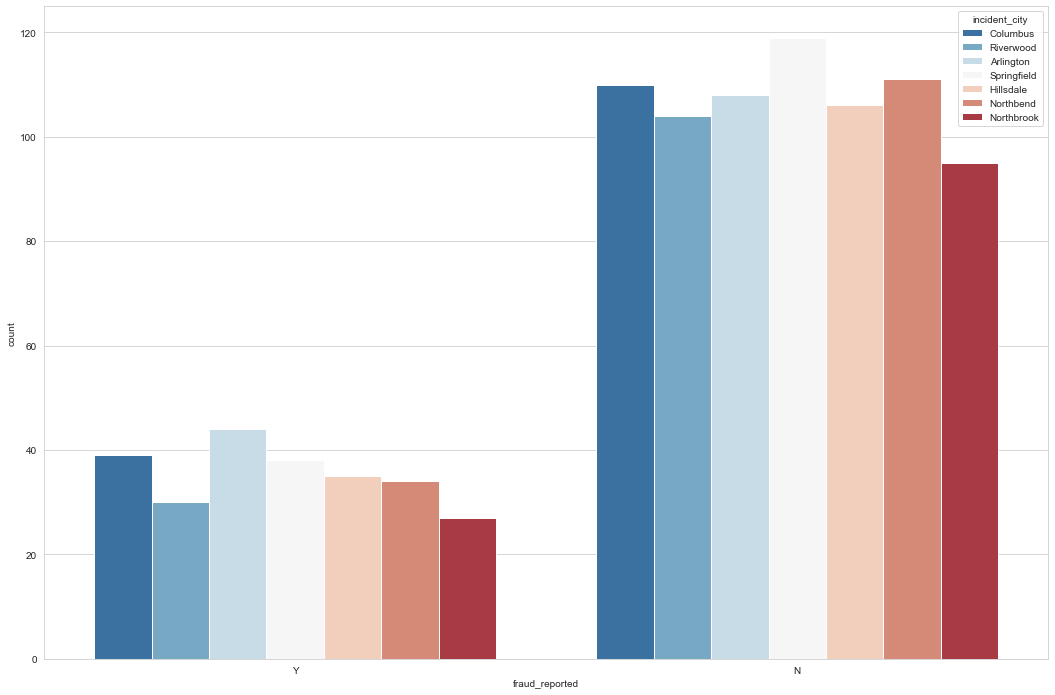

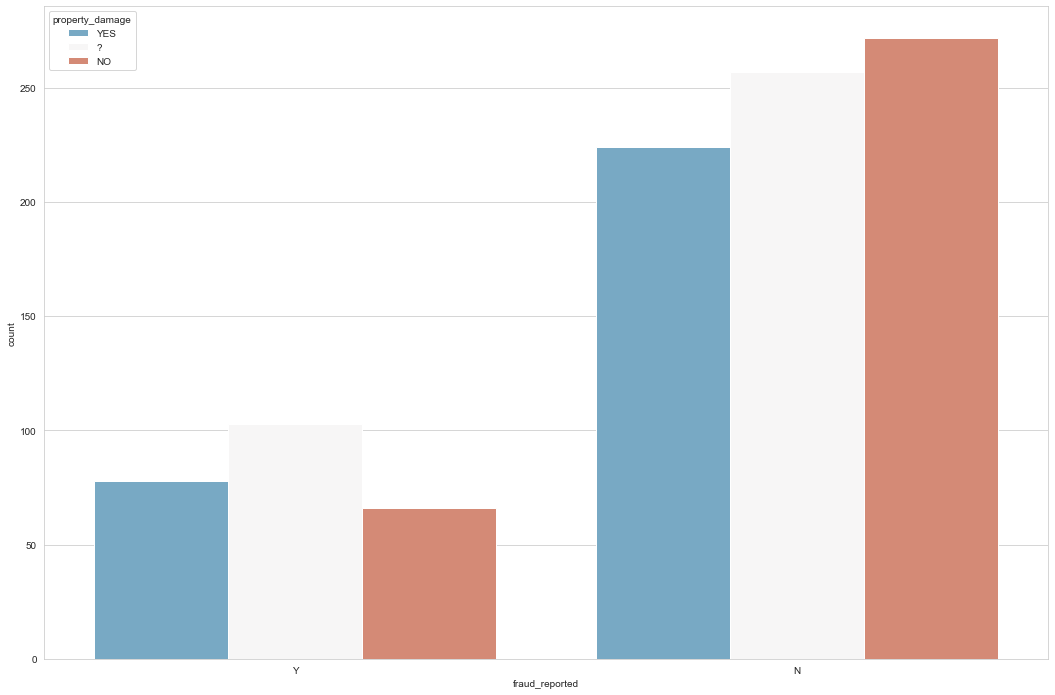

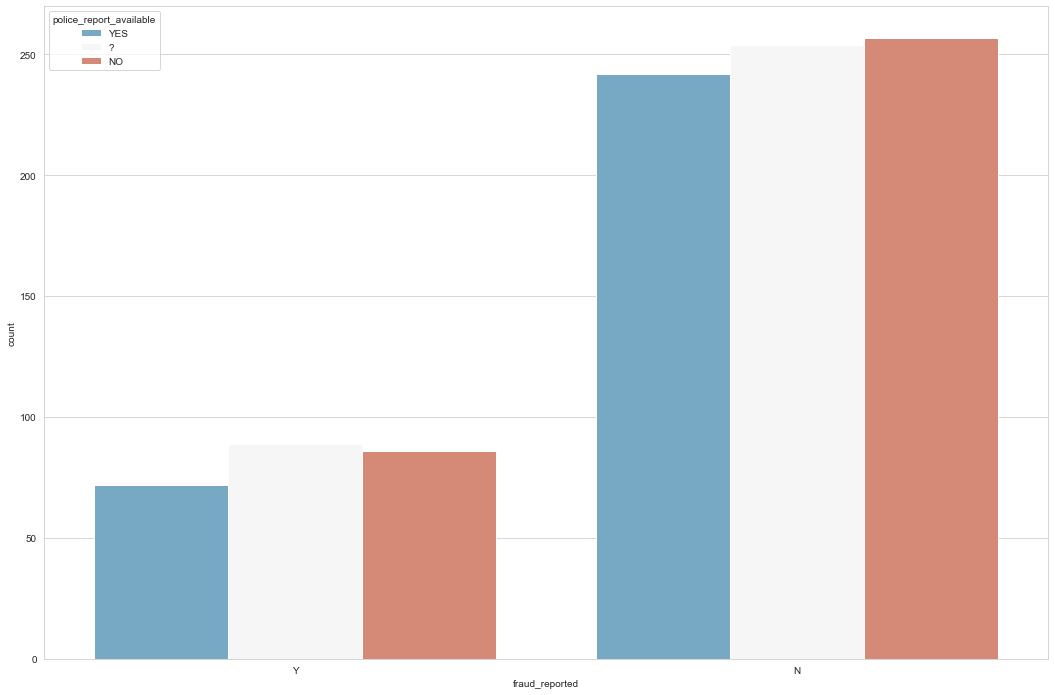

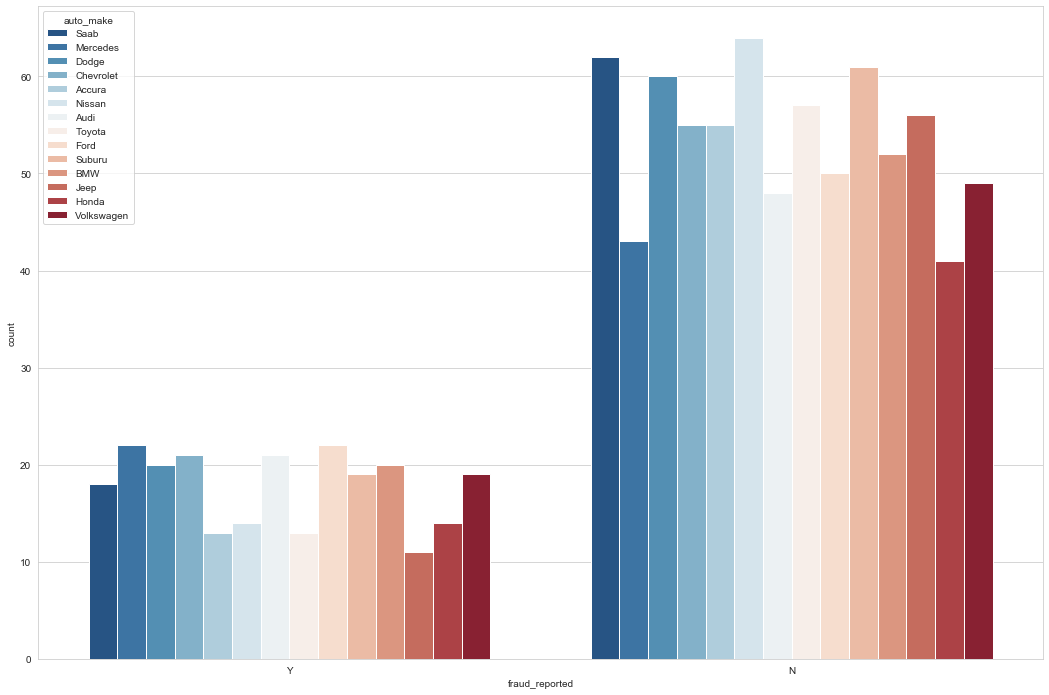

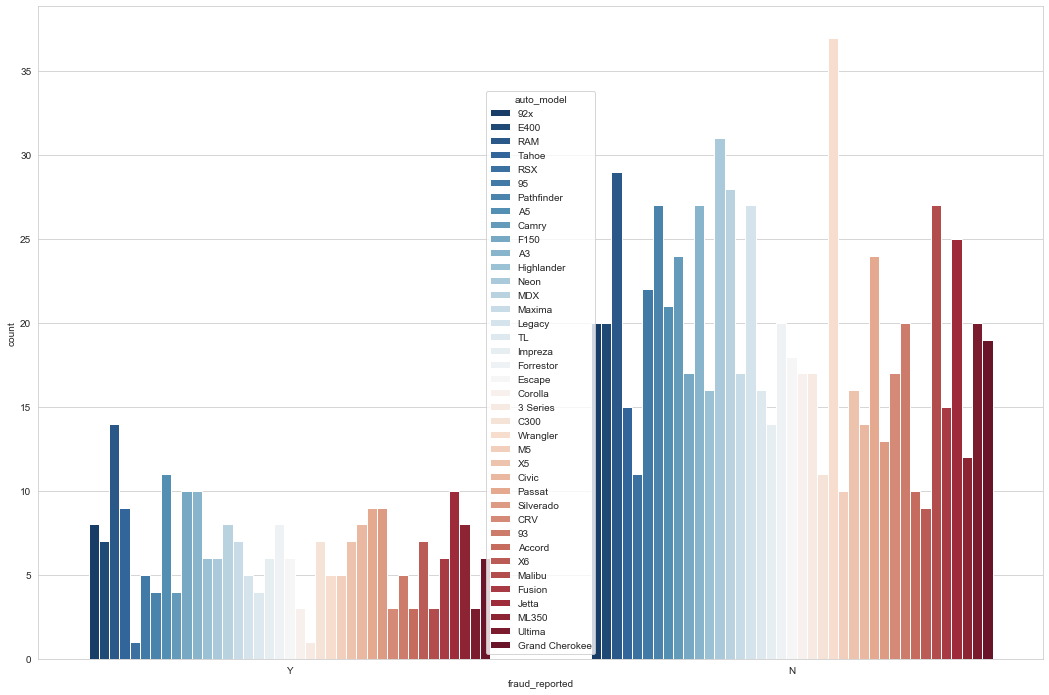

In [21]:
for i in df_str_types:
    plt.figure(figsize=(18,12))
    sns.set_style('whitegrid')
    sns.countplot(x='fraud_reported',hue=i,data=df,palette='RdBu_r')
    plt.show()

In [22]:
df['incident_location'].unique()

array(['9935 4th Drive', '6608 MLK Hwy', '7121 Francis Lane',
       '6956 Maple Drive', '3041 3rd Ave', '8973 Washington St',
       '5846 Weaver Drive', '3525 3rd Hwy', '4872 Rock Ridge',
       '3066 Francis Ave', '1558 1st Ridge', '5971 5th Hwy',
       '6655 5th Drive', '6582 Elm Lane', '6851 3rd Drive',
       '9573 Weaver Ave', '5074 3rd St', '4546 Tree St',
       '3842 Solo Ridge', '8101 3rd Ridge', '5380 Pine St',
       '8957 Weaver Drive', '2526 Embaracadero Ave', '5667 4th Drive',
       '2502 Apache Hwy', '3418 Texas Lane', '2533 Elm St',
       '3790 Andromedia Hwy', '3220 Rock Drive', '2100 Francis Drive',
       '4687 5th Drive', '9038 2nd Lane', '6092 5th Ave',
       '8353 Britain Ridge', '3540 Maple St', '3104 Sky Drive',
       '4981 Weaver St', '6676 Tree Lane', '3930 Embaracadero St',
       '3422 Flute St', '4862 Lincoln Hwy', '5719 2nd Lane',
       '3221 Solo Ridge', '6660 MLK Drive', '1699 Oak Drive',
       '4234 Cherokee Lane', '7476 4th St', '8907 Tree Ave

In [23]:
df.drop('incident_location',axis=1,inplace=True)

In [24]:
df['incident_date'].value_counts()

02-02-2015    28
17-02-2015    26
07-01-2015    25
10-01-2015    24
24-01-2015    24
04-02-2015    24
19-01-2015    23
08-01-2015    22
13-01-2015    21
30-01-2015    21
06-02-2015    20
22-02-2015    20
12-02-2015    20
31-01-2015    20
14-01-2015    19
23-02-2015    19
01-01-2015    19
21-02-2015    19
21-01-2015    19
12-01-2015    19
28-02-2015    18
20-01-2015    18
01-02-2015    18
18-01-2015    18
03-01-2015    18
14-02-2015    18
25-02-2015    18
24-02-2015    17
09-01-2015    17
08-02-2015    17
26-02-2015    17
06-01-2015    17
05-02-2015    16
13-02-2015    16
16-02-2015    16
15-02-2015    16
16-01-2015    16
17-01-2015    15
18-02-2015    15
28-01-2015    15
15-01-2015    15
27-02-2015    14
20-02-2015    14
22-01-2015    14
27-01-2015    13
03-02-2015    13
09-02-2015    13
23-01-2015    13
01-03-2015    12
04-01-2015    12
29-01-2015    11
02-01-2015    11
26-01-2015    11
19-02-2015    10
25-01-2015    10
11-02-2015    10
07-02-2015    10
10-02-2015    10
11-01-2015    

In [25]:
df['incident_year']=df['incident_date'].str.split('-').str[2]
df['policy_bind_year']=df['policy_bind_date'].str.split('-').str[2]

In [26]:
df['incident_day']=df['incident_date'].str.split('-').str[0]
df['policy_bind_day']=df['policy_bind_date'].str.split('-').str[0]

In [27]:
df['incident_month']=df['incident_date'].str.split('-').str[1]
df['policy_bind_month']=df['policy_bind_date'].str.split('-').str[1]

In [28]:
df.drop(['incident_date','policy_bind_date'],axis=1,inplace=True)

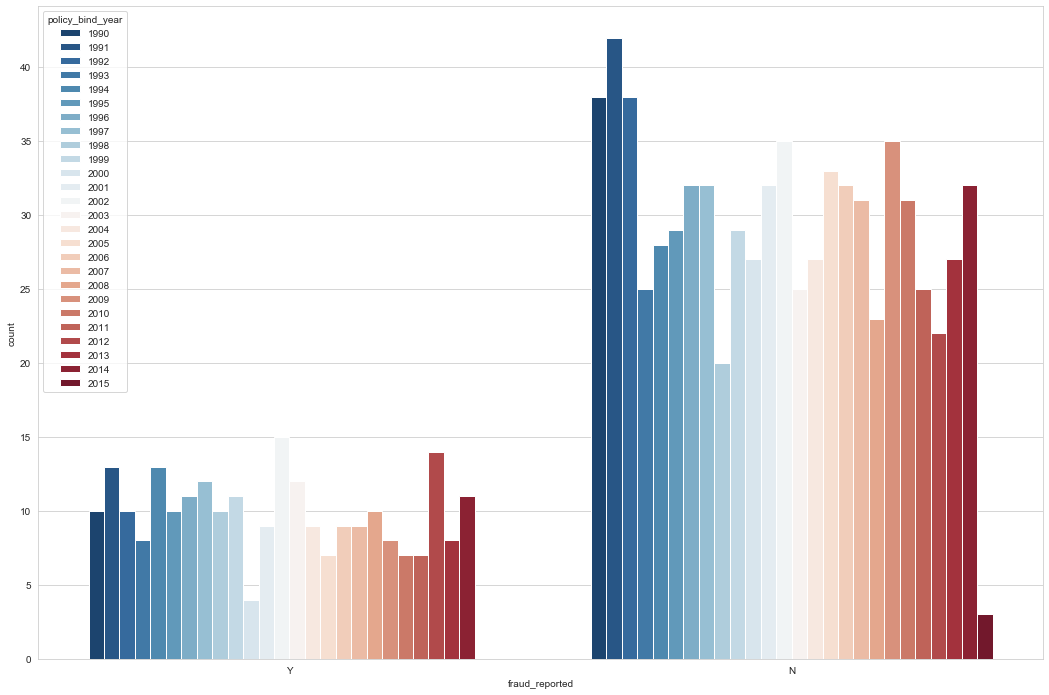

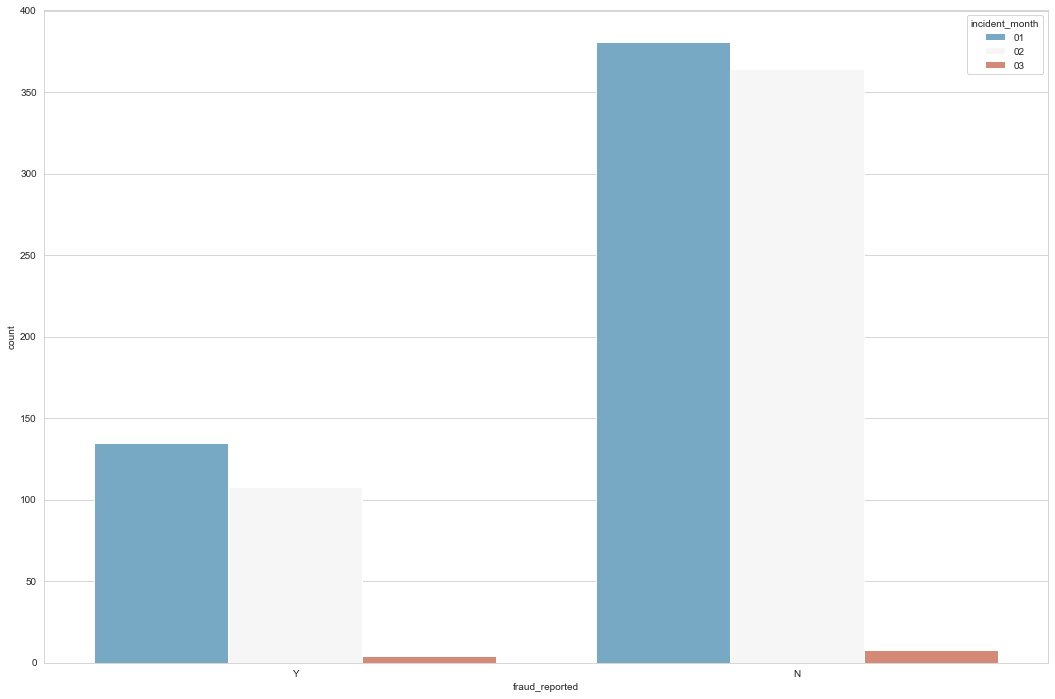

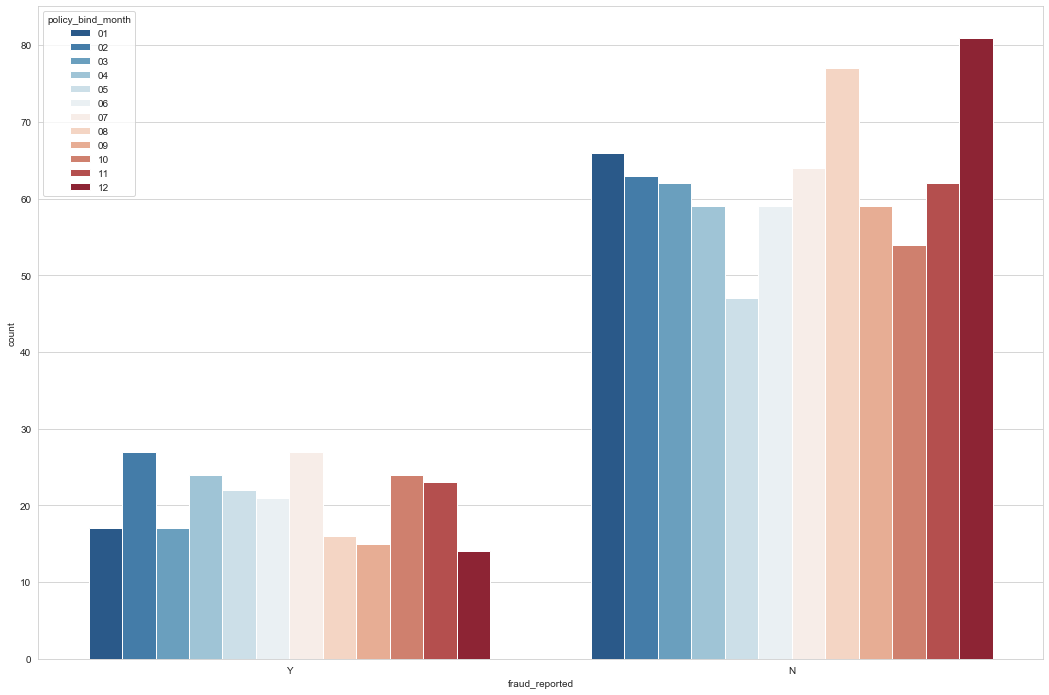

In [29]:
list=['policy_bind_year', 'incident_month', 'policy_bind_month']
for i in list:
    plt.figure(figsize=(18,12))
    sns.set_style('whitegrid')
    sns.countplot(x='fraud_reported',hue=i,data=df,palette='RdBu_r')
    plt.show()   

Observations :-
    
1. Insurance Claims with policy bind in the year 1991 are the least fraud reported.
2. Insurance Claims with policy bind in the year 1998 are the highest fraud reported.
3. Insurance Claims with policy bind in the years 1990, 1992, 2002 and 2009 are also less fraud reported.
4. Insurance Claims with policy bind in the years 2015, 2014, 2011 and 2006 are also high fraud reported.
5. Insurance Claims incident in month of January are the least fraud reported.
6. Insurance Claims incident in month of March are the highest fraud reported.
7. Insurance Claims with policy bind in the month of December are the least fraud reported.
8. Insurance Claims with policy bind in the month of May are the highest fraud reported.
9. Insurance Claims with policy bind in the month of August, January and July are also less fraud reported.

In [30]:
df_int_types=[]
for i in df.columns:
    if df[i].dtypes == "int64" or "float64":
        df_int_types.append(i)

In [31]:
df.head()

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,auto_model,auto_year,fraud_reported,_c39,incident_year,policy_bind_year,incident_day,policy_bind_day,incident_month,policy_bind_month
0,328,48,521585,OH,250/500,1000,1406.91,0,466132,MALE,...,92x,2004,Y,NaN,2015,2014,25,17,01,10
1,228,42,342868,IN,250/500,2000,1197.22,5000000,468176,MALE,...,E400,2007,Y,NaN,2015,2006,21,27,01,06
2,134,29,687698,OH,100/300,2000,1413.14,5000000,430632,FEMALE,...,RAM,2007,N,NaN,2015,2000,22,06,02,09
3,256,41,227811,IL,250/500,2000,1415.74,6000000,608117,FEMALE,...,Tahoe,2014,Y,NaN,2015,1990,10,25,01,05
4,228,44,367455,IL,500/1000,1000,1583.91,6000000,610706,MALE,...,RSX,2009,N,NaN,2015,2014,17,06,02,06


In [32]:
df_int_types

['months_as_customer',
 'age',
 'policy_number',
 'policy_state',
 'policy_csl',
 'policy_deductable',
 'policy_annual_premium',
 'umbrella_limit',
 'insured_zip',
 'insured_sex',
 'insured_education_level',
 'insured_occupation',
 'insured_hobbies',
 'insured_relationship',
 'capital-gains',
 'capital-loss',
 'incident_type',
 'collision_type',
 'incident_severity',
 'authorities_contacted',
 'incident_state',
 'incident_city',
 'incident_hour_of_the_day',
 'number_of_vehicles_involved',
 'property_damage',
 'bodily_injuries',
 'witnesses',
 'police_report_available',
 'total_claim_amount',
 'injury_claim',
 'property_claim',
 'vehicle_claim',
 'auto_make',
 'auto_model',
 'auto_year',
 'fraud_reported',
 '_c39',
 'incident_year',
 'policy_bind_year',
 'incident_day',
 'policy_bind_day',
 'incident_month',
 'policy_bind_month']

In [33]:
df_int_types.remove('incident_year')

In [34]:
df_int_types.remove('policy_bind_year')

In [35]:
df_int_types.remove('incident_day')

In [36]:
df_int_types.remove('policy_bind_day')

In [37]:
df_int_types.remove('incident_month')

In [38]:
df_int_types.remove('policy_bind_month')

In [39]:
for i in df_int_types:
    print(df[i].value_counts())

194    8
285    7
140    7
230    7
128    7
      ..
347    1
113    1
337    1
117    1
0      1
Name: months_as_customer, Length: 391, dtype: int64
43    49
39    48
41    45
34    44
30    42
31    42
38    42
37    41
33    39
32    38
40    38
29    35
46    33
35    32
36    32
42    32
44    32
28    30
45    26
26    26
48    25
47    24
27    24
57    16
25    14
49    14
55    14
50    13
53    13
61    10
24    10
54    10
60     9
51     9
58     8
56     8
23     7
21     6
59     5
62     4
52     4
64     2
63     2
22     1
20     1
19     1
Name: age, dtype: int64
116735    1
107181    1
430794    1
115399    1
328387    1
         ..
218456    1
179538    1
357713    1
247116    1
296960    1
Name: policy_number, Length: 1000, dtype: int64
OH    352
IL    338
IN    310
Name: policy_state, dtype: int64
250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64
1000    351
500     342
2000    307
Name: policy_deductable, dtype: int64
1374.22    2
15

In [40]:
df_dist_plot_int_list=['property_claim','injury_claim','total_claim_amount','capital-loss','capital-gains','insured_zip',
                      'policy_annual_premium','policy_number','months_as_customer','vehicle_claim','age']

In [41]:
df_count_plot_int_list=[
'witnesses',
'bodily_injuries',
'number_of_vehicles_involved',
'incident_hour_of_the_day',
'umbrella_limit',
'policy_deductable',
'auto_year'
]

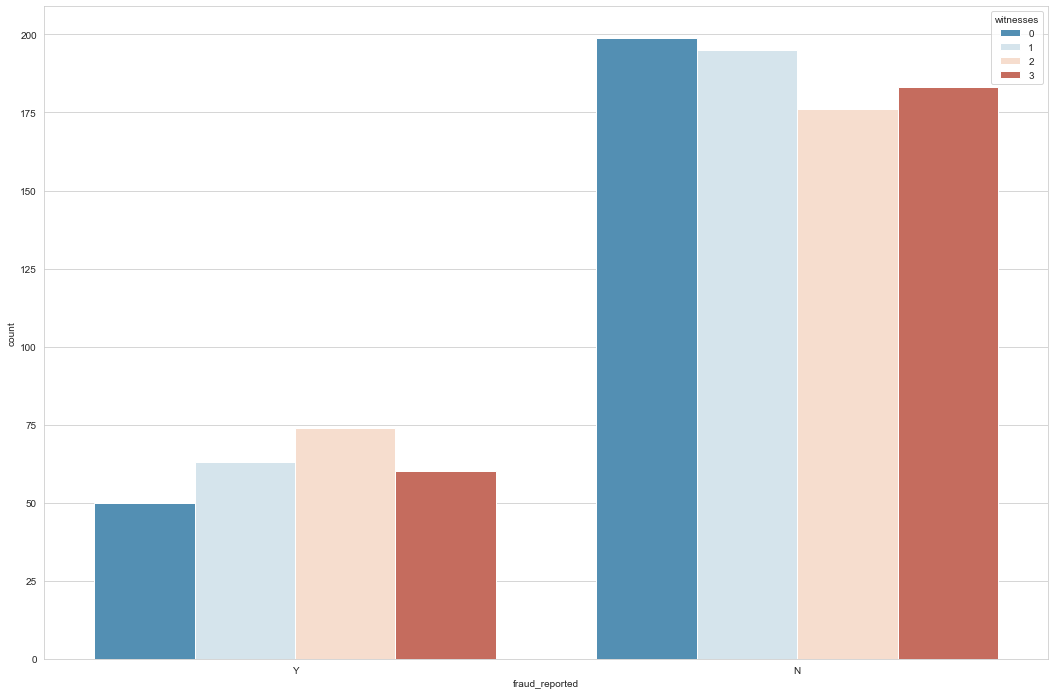

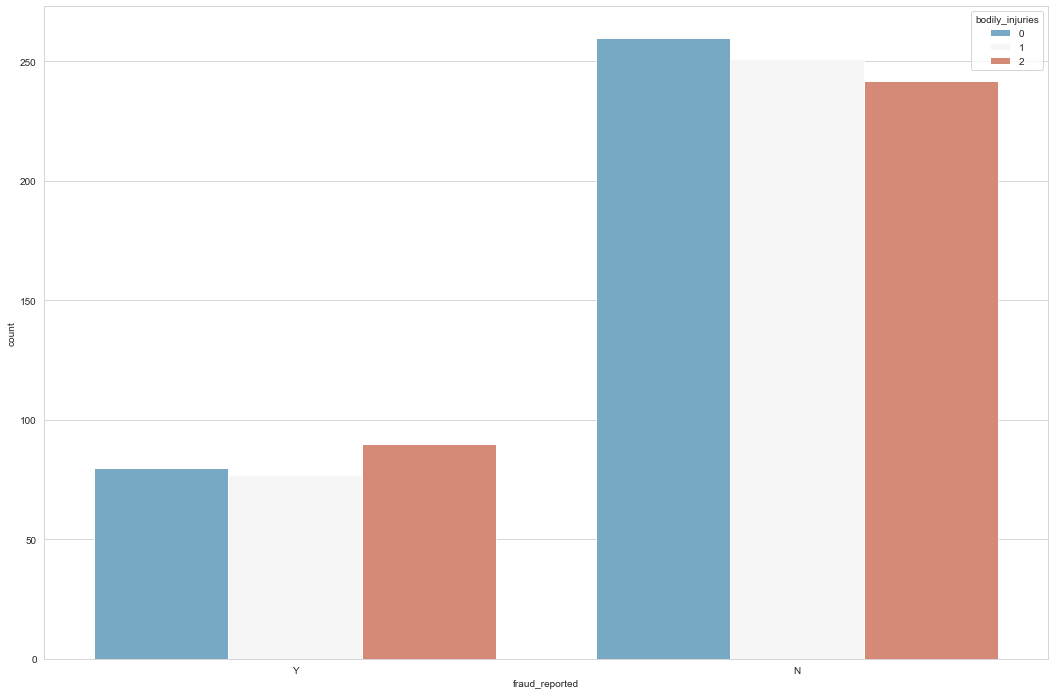

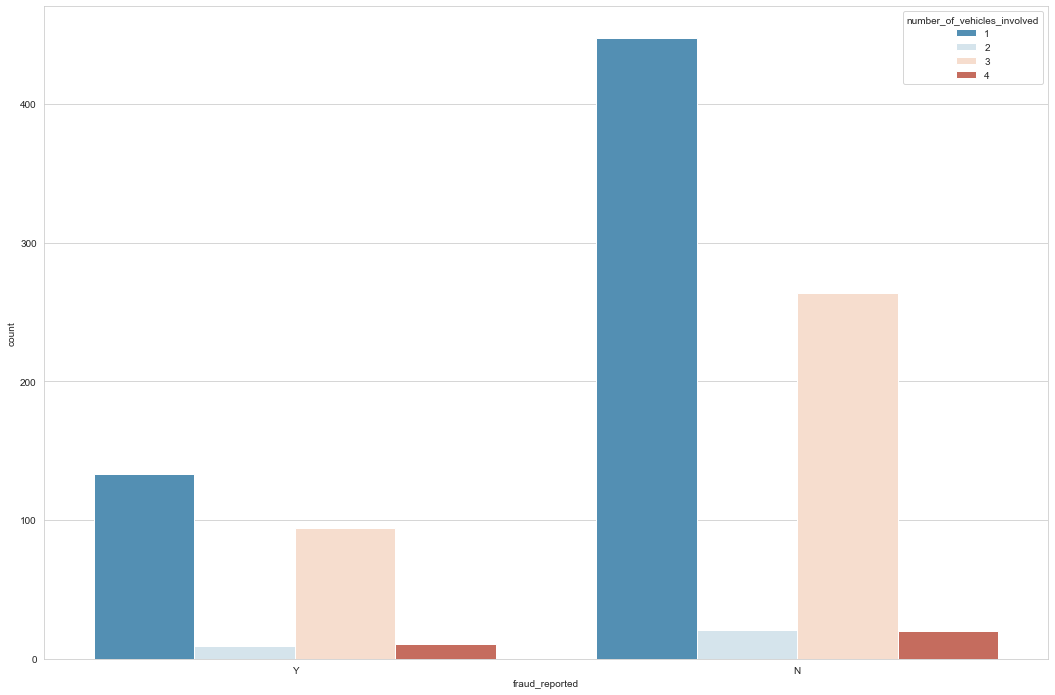

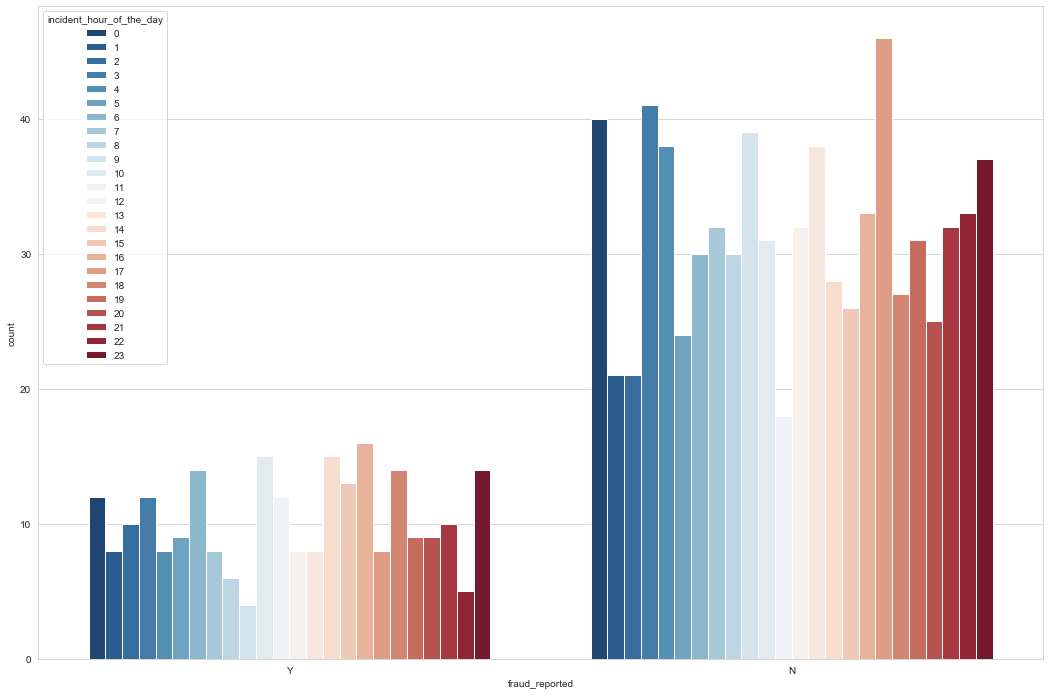

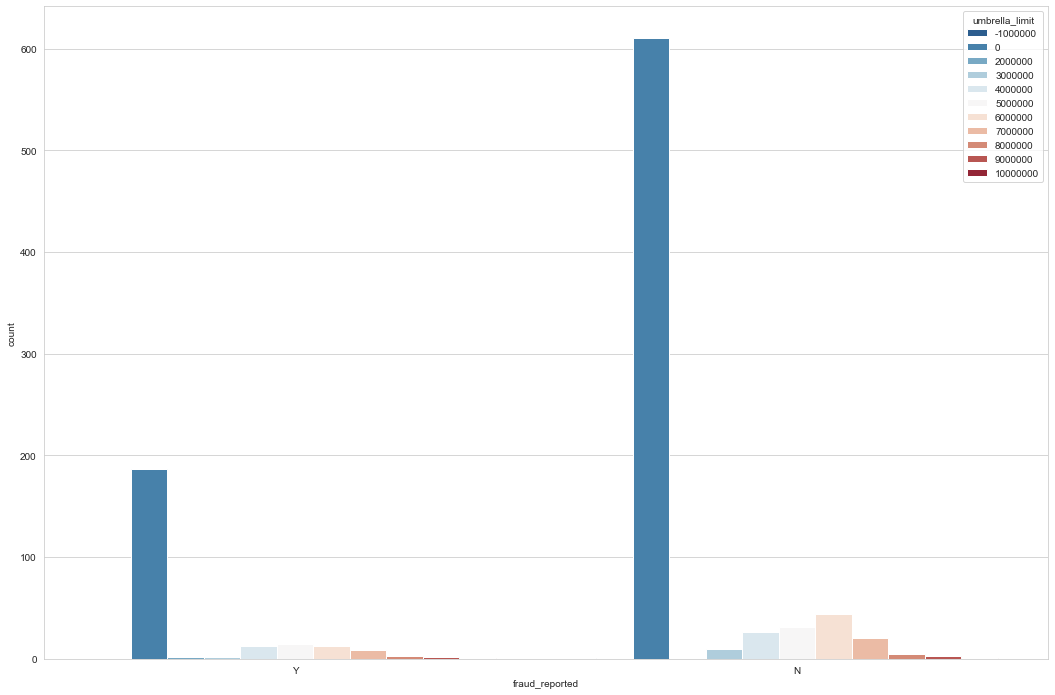

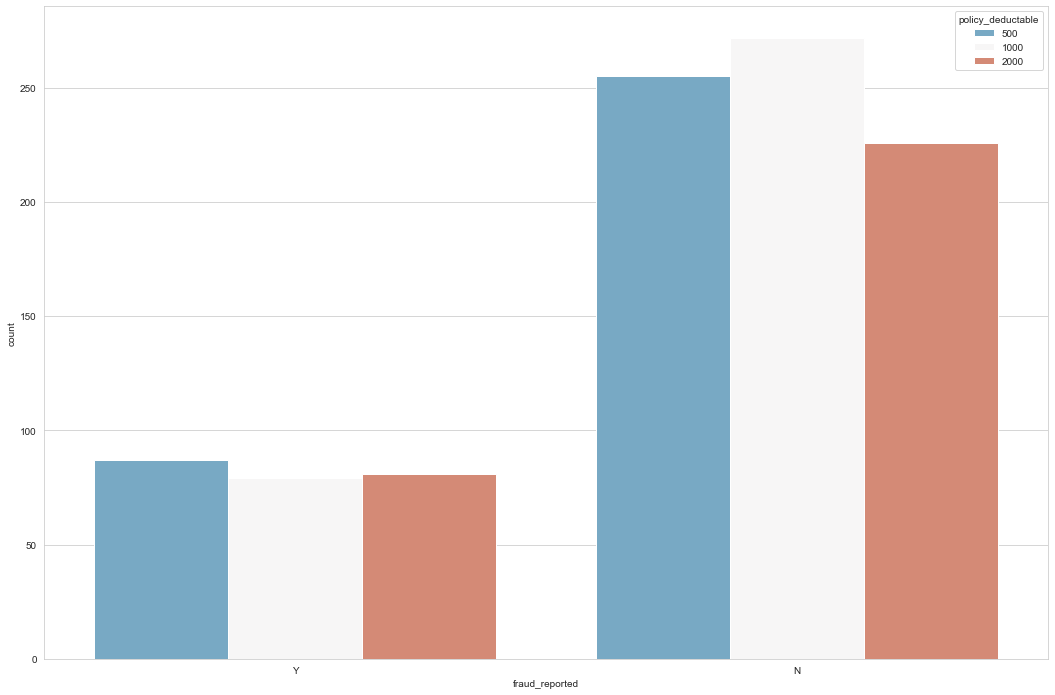

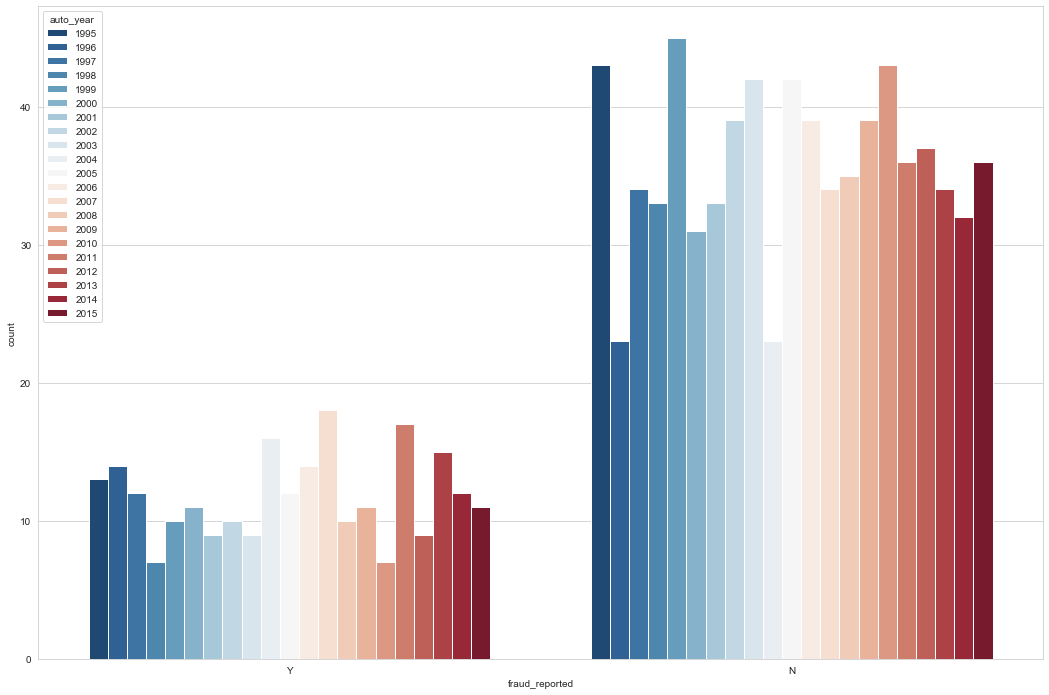

In [42]:
for i in df_count_plot_int_list:
    plt.figure(figsize=(18,12))
    sns.set_style('whitegrid')
    sns.countplot(x='fraud_reported',hue=i,data=df,palette='RdBu_r')
    plt.show()   

from sklearn.preprocessing import LabelEncoder
for i in df_all_l:
    LE=LabelEncoder()
    print(df[i].value_counts().sort_index())
    df[i]=LE.fit_transform(df[i])
    print(df[i].value_counts().sort_index())

df_int_types

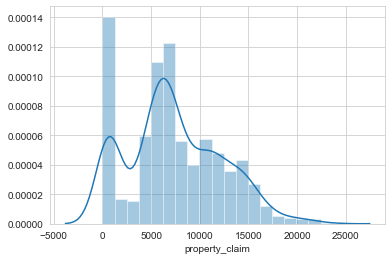

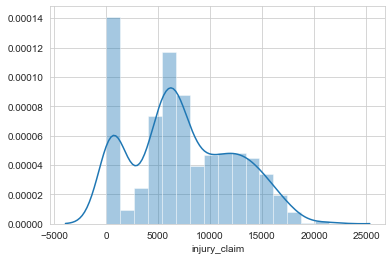

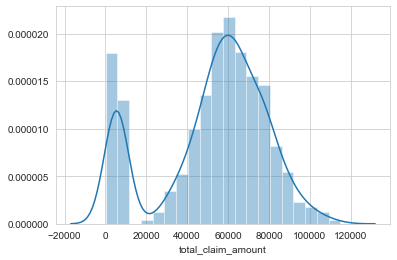

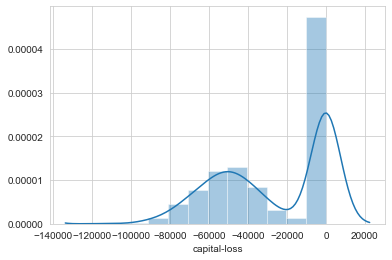

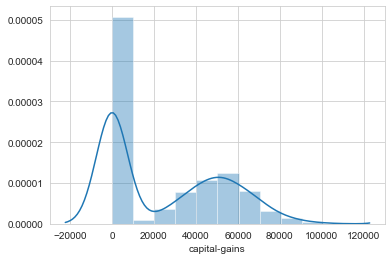

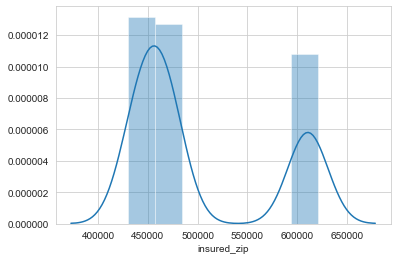

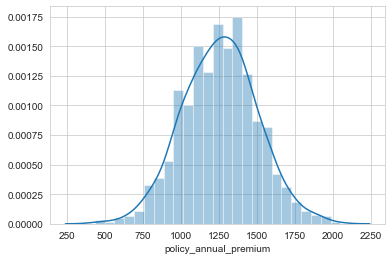

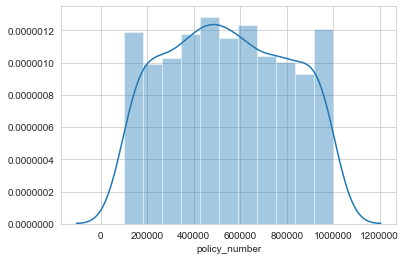

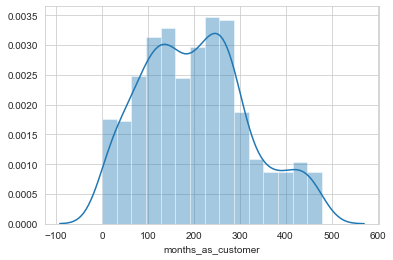

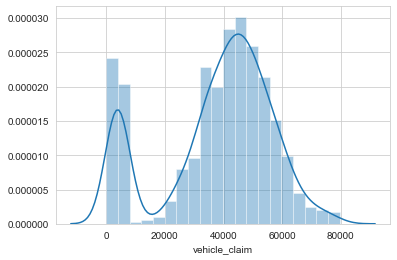

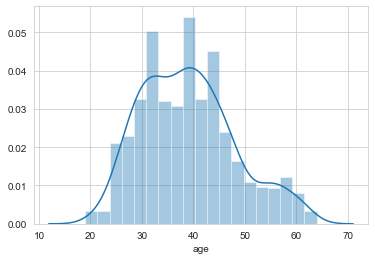

In [43]:
for i in df_dist_plot_int_list:
    sns.distplot(df[i])
    plt.show()

In [44]:
df_le=['police_report_available','property_damage','incident_city','incident_state','authorities_contacted','incident_severity',
'collision_type','incident_type',
'insured_relationship','insured_hobbies','insured_occupation',
'insured_education_level',
'insured_sex','policy_csl',
'policy_state','auto_model',
'auto_make']

In [45]:
df_str_types

['policy_state',
 'policy_csl',
 'insured_sex',
 'insured_education_level',
 'insured_occupation',
 'insured_hobbies',
 'insured_relationship',
 'incident_type',
 'collision_type',
 'incident_severity',
 'authorities_contacted',
 'incident_state',
 'incident_city',
 'property_damage',
 'police_report_available',
 'auto_make',
 'auto_model']

In [46]:
df_all_l=df_le+df_str_types

In [47]:
df_all_l

['police_report_available',
 'property_damage',
 'incident_city',
 'incident_state',
 'authorities_contacted',
 'incident_severity',
 'collision_type',
 'incident_type',
 'insured_relationship',
 'insured_hobbies',
 'insured_occupation',
 'insured_education_level',
 'insured_sex',
 'policy_csl',
 'policy_state',
 'auto_model',
 'auto_make',
 'policy_state',
 'policy_csl',
 'insured_sex',
 'insured_education_level',
 'insured_occupation',
 'insured_hobbies',
 'insured_relationship',
 'incident_type',
 'collision_type',
 'incident_severity',
 'authorities_contacted',
 'incident_state',
 'incident_city',
 'property_damage',
 'police_report_available',
 'auto_make',
 'auto_model']

In [48]:
list=['policy_bind_month','policy_bind_year','policy_bind_day','incident_year','incident_month','incident_day','fraud_reported']
df_all_2=df_all_l+list

In [49]:
from sklearn.preprocessing import LabelEncoder
for i in df_all_2:
    LE=LabelEncoder()
    print(df[i].value_counts().sort_index())
    df[i]=LE.fit_transform(df[i])
    print(df[i].value_counts().sort_index())

?      343
NO     343
YES    314
Name: police_report_available, dtype: int64
0    343
1    343
2    314
Name: police_report_available, dtype: int64
?      360
NO     338
YES    302
Name: property_damage, dtype: int64
0    360
1    338
2    302
Name: property_damage, dtype: int64
Arlington      152
Columbus       149
Hillsdale      141
Northbend      145
Northbrook     122
Riverwood      134
Springfield    157
Name: incident_city, dtype: int64
0    152
1    149
2    141
3    145
4    122
5    134
6    157
Name: incident_city, dtype: int64
NC    110
NY    262
OH     23
PA     30
SC    248
VA    110
WV    217
Name: incident_state, dtype: int64
0    110
1    262
2     23
3     30
4    248
5    110
6    217
Name: incident_state, dtype: int64
Ambulance    196
Fire         223
None          91
Other        198
Police       292
Name: authorities_contacted, dtype: int64
0    196
1    223
2     91
3    198
4    292
Name: authorities_contacted, dtype: int64
Major Damage      276
Minor Damage     

In [50]:
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_state                     int64
policy_csl                       int64
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                      int64
insured_education_level          int64
insured_occupation               int64
insured_hobbies                  int64
insured_relationship             int64
capital-gains                    int64
capital-loss                     int64
incident_type                    int64
collision_type                   int64
incident_severity                int64
authorities_contacted            int64
incident_state                   int64
incident_city                    int64
incident_hour_of_the_day         int64
number_of_vehicles_involved      int64
property_damage                  int64
bodily_injuries          

In [51]:
df.drop(['_c39','incident_year'],axis=1,inplace=True)

In [52]:
dfcorr=df.corr()
dfcorr

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,policy_bind_year,incident_day,policy_bind_day,incident_month,policy_bind_month
months_as_customer,1.000000,0.922098,0.057555,-0.000328,-0.026819,0.026807,0.005018,0.015498,0.017895,0.060925,...,0.061013,0.047655,0.004202,-0.000292,0.020544,-0.048276,-0.001455,0.054809,-0.042826,-0.001559
age,0.922098,1.000000,0.059413,-0.014533,-0.015185,0.029188,0.014404,0.018126,0.025604,0.073337,...,0.062588,0.030410,0.017343,0.001354,0.012143,-0.037444,0.003697,0.056776,-0.037058,0.008357
policy_number,0.057555,0.059413,1.000000,0.072815,0.038917,-0.006738,0.022566,0.008968,0.007083,0.004564,...,-0.020184,0.023860,0.065240,-0.000183,-0.029443,-0.040099,0.054788,0.045574,-0.032472,-0.003439
policy_state,-0.000328,-0.014533,0.072815,1.000000,0.001027,0.010033,0.012455,-0.029580,0.008777,-0.020481,...,0.001425,0.017124,-0.025253,0.002114,0.029432,-0.007276,0.025572,0.011178,0.018531,0.046871
policy_csl,-0.026819,-0.015185,0.038917,0.001027,1.000000,0.003384,0.023978,0.021636,0.006879,-0.010757,...,-0.046791,-0.004701,0.047885,-0.033082,-0.037190,-0.016466,-0.007640,0.010164,-0.030164,-0.021547
policy_deductable,0.026807,0.029188,-0.006738,0.010033,0.003384,1.000000,-0.003245,0.010870,0.004545,-0.009733,...,0.005269,-0.035379,-0.003268,0.026105,0.014817,-0.049598,-0.022701,-0.000265,-0.026416,-0.025020
policy_annual_premium,0.005018,0.014404,0.022566,0.012455,0.023978,-0.003245,1.000000,-0.006247,0.032354,0.038853,...,0.020246,0.000045,-0.031849,-0.049226,-0.014480,0.001249,0.028797,-0.037933,-0.046097,-0.002480
umbrella_limit,0.015498,0.018126,0.008968,-0.029580,0.021636,0.010870,-0.006247,1.000000,0.019671,0.010688,...,-0.038584,-0.004443,0.040256,0.009893,0.058622,0.048008,-0.009974,-0.023361,-0.002576,-0.045871
insured_zip,0.017895,0.025604,0.007083,0.008777,0.006879,0.004545,0.032354,0.019671,1.000000,-0.036942,...,-0.041083,-0.020892,0.023637,-0.032736,0.019368,-0.001100,0.027031,-0.044250,-0.032630,0.025924
insured_sex,0.060925,0.073337,0.004564,-0.020481,-0.010757,-0.009733,0.038853,0.010688,-0.036942,1.000000,...,-0.029609,0.026457,-0.018421,-0.028247,0.030873,-0.032891,0.001924,0.039769,-0.025471,-0.001042


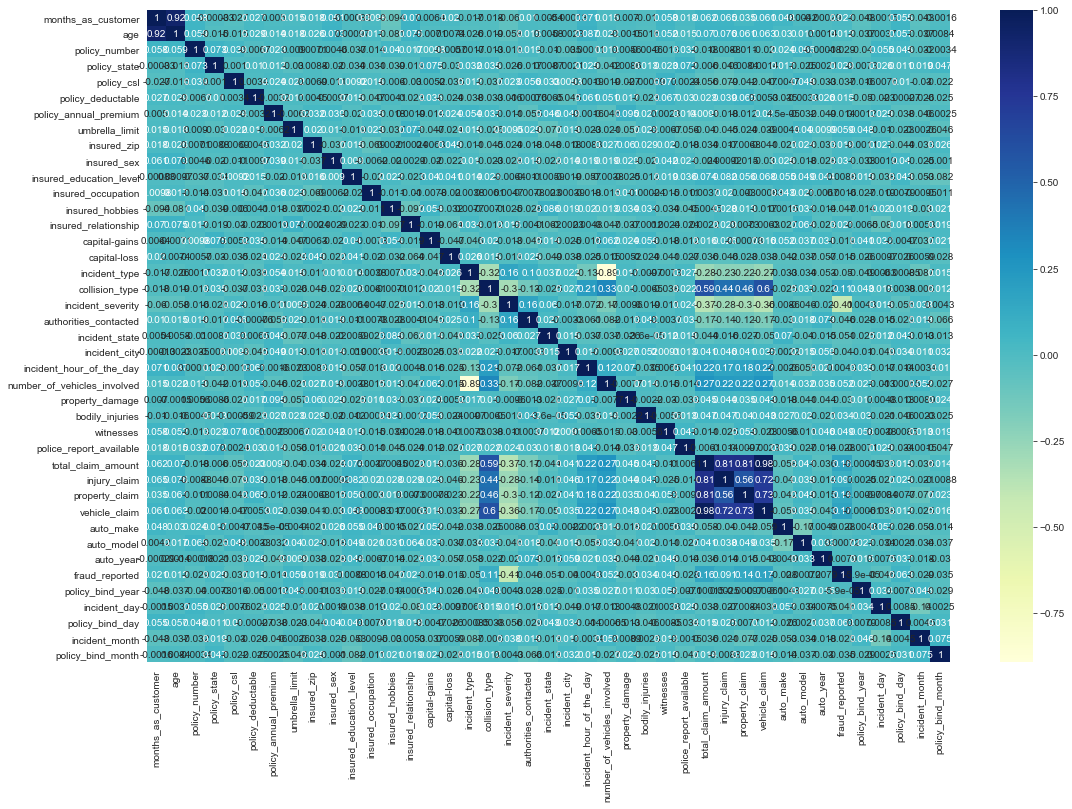

In [53]:
# Multivariate Analysis
plt.figure(figsize=(18,12))
sns.heatmap(dfcorr,cmap='YlGnBu',annot=True)

In [54]:
dfcorr["fraud_reported"].sort_values(ascending=False)

fraud_reported                 1.000000
vehicle_claim                  0.170049
total_claim_amount             0.163651
property_claim                 0.137835
collision_type                 0.110130
injury_claim                   0.090975
policy_bind_day                0.063040
umbrella_limit                 0.058622
number_of_vehicles_involved    0.051839
witnesses                      0.049497
bodily_injuries                0.033877
insured_sex                    0.030873
policy_state                   0.029432
insured_relationship           0.021043
months_as_customer             0.020544
insured_zip                    0.019368
policy_deductable              0.014817
age                            0.012143
insured_education_level        0.008808
auto_year                      0.007928
incident_hour_of_the_day       0.004316
insured_occupation             0.001564
auto_model                     0.000720
policy_bind_year              -0.000059
policy_annual_premium         -0.014480


In [56]:
dfcorr["vehicle_claim"].sort_values(ascending=True)

incident_severity             -0.361958
incident_type                 -0.271635
authorities_contacted         -0.169710
auto_make                     -0.059427
incident_state                -0.050372
policy_csl                    -0.046791
auto_year                     -0.042768
insured_zip                   -0.041083
umbrella_limit                -0.038584
incident_day                  -0.037652
capital-loss                  -0.032665
insured_sex                   -0.029609
incident_month                -0.024981
witnesses                     -0.022564
policy_number                 -0.020184
insured_hobbies               -0.016814
insured_relationship          -0.006256
police_report_available       -0.002306
insured_occupation            -0.000829
policy_bind_year              -0.000610
policy_state                   0.001425
policy_deductable              0.005269
policy_bind_day                0.012370
policy_bind_month              0.015770
capital-gains                  0.015836


In [57]:
dfcorr["vehicle_claim"].sort_values(ascending=False)

vehicle_claim                  1.000000
total_claim_amount             0.982773
property_claim                 0.732090
injury_claim                   0.722878
collision_type                 0.597208
number_of_vehicles_involved    0.269393
incident_hour_of_the_day       0.215626
fraud_reported                 0.170049
insured_education_level        0.068348
age                            0.062588
months_as_customer             0.061013
bodily_injuries                0.043449
property_damage                0.043313
incident_city                  0.035303
auto_model                     0.034645
policy_annual_premium          0.020246
capital-gains                  0.015836
policy_bind_month              0.015770
policy_bind_day                0.012370
policy_deductable              0.005269
policy_state                   0.001425
policy_bind_year              -0.000610
insured_occupation            -0.000829
police_report_available       -0.002306
insured_relationship          -0.006256


# Plotting Outliers

months_as_customer                AxesSubplot(0.125,0.125;0.0158163x0.755)
age                             AxesSubplot(0.14398,0.125;0.0158163x0.755)
policy_number                  AxesSubplot(0.162959,0.125;0.0158163x0.755)
policy_state                   AxesSubplot(0.181939,0.125;0.0158163x0.755)
policy_csl                     AxesSubplot(0.200918,0.125;0.0158163x0.755)
policy_deductable              AxesSubplot(0.219898,0.125;0.0158163x0.755)
policy_annual_premium          AxesSubplot(0.238878,0.125;0.0158163x0.755)
umbrella_limit                 AxesSubplot(0.257857,0.125;0.0158163x0.755)
insured_zip                    AxesSubplot(0.276837,0.125;0.0158163x0.755)
insured_sex                    AxesSubplot(0.295816,0.125;0.0158163x0.755)
insured_education_level        AxesSubplot(0.314796,0.125;0.0158163x0.755)
insured_occupation             AxesSubplot(0.333776,0.125;0.0158163x0.755)
insured_hobbies                AxesSubplot(0.352755,0.125;0.0158163x0.755)
insured_relationship     

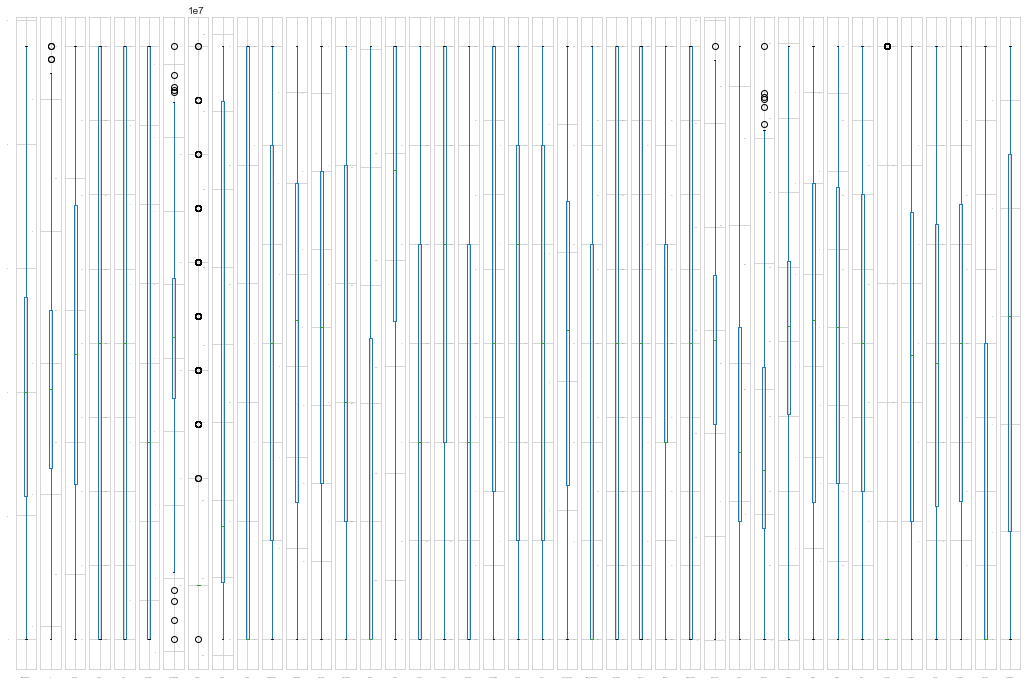

In [59]:
#df.drop('fraud_reported',axis=1,inplace=True)
df.plot(kind='box',subplots=True,layout=(1,41),sharex=False,fontsize=1,figsize=(18,12))

# Removing Outliers

In [60]:
from scipy.stats import zscore
z=np.abs(zscore(df))

In [61]:
z

array([[1.07813958, 0.99083647, 0.09595307, ..., 0.1762916 , 0.94758696,
        0.98368427],
       [0.2089946 , 0.33407345, 0.79152739, ..., 1.31219112, 0.94758696,
        0.15980224],
       [0.60800168, 1.08891308, 0.55056594, ..., 1.07319786, 0.96287062,
        0.69781264],
       ...,
       [0.64276748, 0.54161057, 1.44891961, ..., 0.1762916 , 0.94758696,
        1.30328875],
       [2.20802805, 2.52328351, 0.04786687, ..., 0.28988156, 0.96287062,
        1.2695559 ],
       [2.19064515, 2.3043625 , 0.03830297, ..., 0.5052481 , 0.96287062,
        1.2695559 ]])

In [62]:
threshold=3
print(np.where(z>3))

(array([ 31,  48,  88, 115, 119, 229, 248, 262, 314, 430, 458, 500, 503,
       657, 700, 763, 807, 875, 922, 975], dtype=int64), array([ 7,  7,  7,  7,  7,  6,  6,  7,  7,  7,  7, 30,  7,  7,  7,  6, 15,
        7,  7,  7], dtype=int64))


In [63]:
df_new=df[(z<3).all(axis=1)]

In [64]:
df_new.shape

(980, 41)

In [65]:
df.shape

(1000, 41)

In [66]:
df=df_new

In [67]:
((1000-980)/1000)*100

2.0

# To check Skewness

In [68]:
df_1=df['fraud_reported']

In [69]:
df.drop('fraud_reported',axis=1,inplace=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002BC47BFD988>,
      dtype=object)

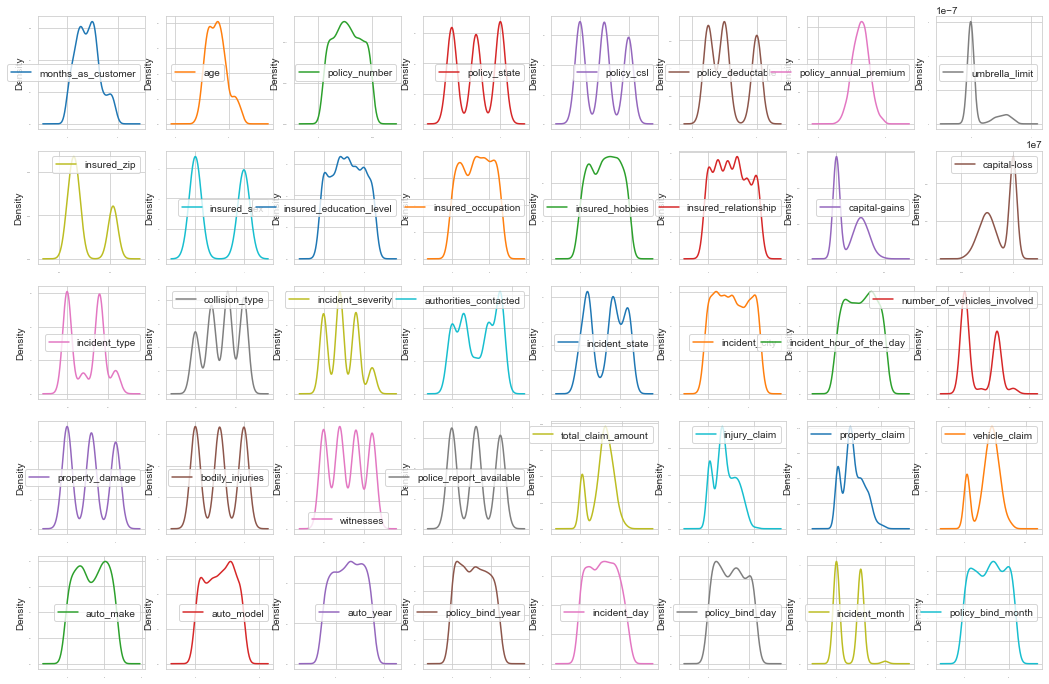

In [70]:
df.plot(kind='density',subplots=True,layout=(5,8),sharex=False,fontsize=1,figsize=(18,12))

Observations :-
    
1. umbrella_limit and insured_zip are right skewed.
2. total_claim_amount and vehicle_claim are left skewed

In [71]:
df.skew()

months_as_customer             0.362608
age                            0.475385
policy_number                  0.036283
policy_state                  -0.038157
policy_csl                     0.098248
policy_deductable              0.476090
policy_annual_premium          0.035964
umbrella_limit                 1.801424
insured_zip                    0.837283
insured_sex                    0.139324
insured_education_level        0.006286
insured_occupation            -0.055360
insured_hobbies               -0.061488
insured_relationship           0.078339
capital-gains                  0.466619
capital-loss                  -0.376884
incident_type                  0.090563
collision_type                -0.194015
incident_severity              0.277726
authorities_contacted         -0.114044
incident_state                -0.149255
incident_city                  0.043882
incident_hour_of_the_day      -0.039280
number_of_vehicles_involved    0.509725
property_damage                0.101196


In [72]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_state',
       'policy_csl', 'policy_deductable', 'policy_annual_premium',
       'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_hour_of_the_day', 'number_of_vehicles_involved',
       'property_damage', 'bodily_injuries', 'witnesses',
       'police_report_available', 'total_claim_amount', 'injury_claim',
       'property_claim', 'vehicle_claim', 'auto_make', 'auto_model',
       'auto_year', 'policy_bind_year', 'incident_day', 'policy_bind_day',
       'incident_month', 'policy_bind_month'],
      dtype='object')

# Train Test Split

In [73]:
x=df[['months_as_customer', 'age', 'policy_number', 'policy_state',
       'policy_csl', 'policy_deductable', 'policy_annual_premium',
       'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_hour_of_the_day', 'number_of_vehicles_involved',
       'property_damage', 'bodily_injuries', 'witnesses',
       'police_report_available', 'total_claim_amount', 'injury_claim',
       'property_claim', 'vehicle_claim', 'auto_make', 'auto_model',
       'auto_year', 'policy_bind_year', 'incident_day', 'policy_bind_day',
       'incident_month', 'policy_bind_month']]

y=df_1

In [74]:
x.head()

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,property_claim,vehicle_claim,auto_make,auto_model,auto_year,policy_bind_year,incident_day,policy_bind_day,incident_month,policy_bind_month
0,328,48,521585,2,1,1000,1406.91,0,466132,1,...,13020,52080,10,1,2004,24,24,16,0,9
1,228,42,342868,1,1,2000,1197.22,5000000,468176,1,...,780,3510,8,12,2007,16,20,26,0,5
2,134,29,687698,2,0,2000,1413.14,5000000,430632,0,...,3850,23100,4,30,2007,10,21,5,1,8
3,256,41,227811,0,1,2000,1415.74,6000000,608117,0,...,6340,50720,3,34,2014,0,9,24,0,4
4,228,44,367455,0,2,1000,1583.91,6000000,610706,1,...,650,4550,0,31,2009,24,16,5,1,5


In [75]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_state',
       'policy_csl', 'policy_deductable', 'policy_annual_premium',
       'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_hour_of_the_day', 'number_of_vehicles_involved',
       'property_damage', 'bodily_injuries', 'witnesses',
       'police_report_available', 'total_claim_amount', 'injury_claim',
       'property_claim', 'vehicle_claim', 'auto_make', 'auto_model',
       'auto_year', 'policy_bind_year', 'incident_day', 'policy_bind_day',
       'incident_month', 'policy_bind_month'],
      dtype='object')

# Solution of Class Imbalance

In [76]:
import imblearn

In [77]:
from imblearn.over_sampling import SMOTE

In [78]:
SM=SMOTE()

In [79]:
x_over,y_over=SM.fit_resample(x,y)

In [80]:
y_over.value_counts()
y_over.head()
y=pd.DataFrame(y_over,columns=['fraud_reported'])
y.head()
x=pd.DataFrame(x_over,columns=['months_as_customer', 'age', 'policy_number', 'policy_state',
       'policy_csl', 'policy_deductable', 'policy_annual_premium',
       'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_hour_of_the_day', 'number_of_vehicles_involved',
       'property_damage', 'bodily_injuries', 'witnesses',
       'police_report_available', 'total_claim_amount', 'injury_claim',
       'property_claim', 'vehicle_claim', 'auto_make', 'auto_model',
       'auto_year', 'policy_bind_year', 'incident_day', 'policy_bind_day',
       'incident_month', 'policy_bind_month'])

In [81]:
df=pd.concat((x,y),axis=1)

In [82]:
df.shape

(1480, 41)

# Scaling of Data

In [83]:
from sklearn.preprocessing import StandardScaler
SC=StandardScaler()
x=SC.fit_transform(x)

In [84]:

x

array([[ 1.11626163,  1.0484018 , -0.05119607, ...,  0.15423549,
        -0.82328673,  1.10928056],
       [ 0.20767373,  0.3643098 , -0.76453246, ...,  1.364567  ,
        -0.82328673, -0.11498136],
       [-0.6463989 , -1.11788952,  0.61183235, ..., -1.17712917,
         1.13881369,  0.80321508],
       ...,
       [ 0.8709429 ,  0.59234047, -1.50612818, ...,  0.75940124,
        -0.82328673, -1.03317779],
       [-1.16429401, -1.23190486, -0.28744482, ...,  0.03320234,
        -0.82328673,  0.4971496 ],
       [-0.68274242, -1.11788952, -1.23623966, ..., -1.17712917,
        -0.82328673,  1.10928056]])

In [85]:
x=pd.DataFrame(x)

In [86]:
x

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,1.116262,1.048402,-0.051196,1.348519,0.236275,-0.240828,0.659270,-0.497511,-0.489900,1.287281,...,1.151245,0.700259,0.975930,-1.687674,-0.185188,1.838565,1.284635,0.154235,-0.823287,1.109281
1,0.207674,0.364310,-0.764532,0.084549,0.236275,1.475098,-0.255101,1.782090,-0.460493,1.287281,...,-1.564148,-2.114227,0.448304,-0.644690,0.344943,0.680784,0.791953,1.364567,-0.823287,-0.114981
2,-0.646399,-1.117890,0.611832,1.348519,-1.073413,1.475098,0.686436,1.782090,-1.000643,-0.776831,...,-0.883082,-0.979045,-0.606948,1.062012,0.344943,-0.187553,0.915124,-1.177129,1.138814,0.803215
3,0.462078,0.250294,-1.223774,-1.179421,0.236275,1.475098,0.697774,2.238010,1.552855,-0.776831,...,-0.330685,0.621451,-0.870761,1.441279,1.581915,-1.634780,-0.562923,1.122501,-0.823287,-0.421047
4,0.207674,0.592340,-0.666395,-1.179421,1.545963,-0.240828,1.431093,2.238010,1.590104,1.287281,...,-1.592988,-2.053962,-1.662200,1.156828,0.698364,1.838565,0.299271,-1.177129,1.138814,-0.114981
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1475,1.734101,2.074540,-0.077188,1.348519,-1.073413,-1.071336,-1.137484,-0.497511,-0.443114,-0.776831,...,1.641524,2.088438,-1.662200,1.346462,-0.538608,-0.187553,-1.548287,-0.087831,1.138814,1.109281
1476,-0.900804,-0.661828,0.050330,1.348519,-1.073413,-0.422716,-0.882158,2.693930,1.191206,-0.776831,...,0.600624,0.125019,0.712117,-1.498041,1.051785,0.970229,1.161465,0.396302,1.138814,-0.114981
1477,0.870943,0.592340,-1.506128,1.348519,0.236275,1.075287,0.105379,-0.497511,-0.517553,1.287281,...,0.445553,-0.104915,-0.079322,-1.213590,0.168233,-0.621721,0.052930,0.759401,-0.823287,-1.033178
1478,-1.164294,-1.231905,-0.287445,-1.179421,0.236275,-0.131009,-0.480915,2.238010,1.550007,-0.776831,...,-0.503060,-0.246363,0.712117,-1.592857,-0.892029,1.114952,-0.070240,0.033202,-0.823287,0.497150


In [87]:
x.columns=['months_as_customer', 'age', 'policy_number', 'policy_state',
       'policy_csl', 'policy_deductable', 'policy_annual_premium',
       'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_hour_of_the_day', 'number_of_vehicles_involved',
       'property_damage', 'bodily_injuries', 'witnesses',
       'police_report_available', 'total_claim_amount', 'injury_claim',
       'property_claim', 'vehicle_claim', 'auto_make', 'auto_model',
       'auto_year', 'policy_bind_year', 'incident_day', 'policy_bind_day',
       'incident_month', 'policy_bind_month']

In [88]:
x.head()

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,property_claim,vehicle_claim,auto_make,auto_model,auto_year,policy_bind_year,incident_day,policy_bind_day,incident_month,policy_bind_month
0,1.116262,1.048402,-0.051196,1.348519,0.236275,-0.240828,0.659270,-0.497511,-0.489900,1.287281,...,1.151245,0.700259,0.975930,-1.687674,-0.185188,1.838565,1.284635,0.154235,-0.823287,1.109281
1,0.207674,0.364310,-0.764532,0.084549,0.236275,1.475098,-0.255101,1.782090,-0.460493,1.287281,...,-1.564148,-2.114227,0.448304,-0.644690,0.344943,0.680784,0.791953,1.364567,-0.823287,-0.114981
2,-0.646399,-1.117890,0.611832,1.348519,-1.073413,1.475098,0.686436,1.782090,-1.000643,-0.776831,...,-0.883082,-0.979045,-0.606948,1.062012,0.344943,-0.187553,0.915124,-1.177129,1.138814,0.803215
3,0.462078,0.250294,-1.223774,-1.179421,0.236275,1.475098,0.697774,2.238010,1.552855,-0.776831,...,-0.330685,0.621451,-0.870761,1.441279,1.581915,-1.634780,-0.562923,1.122501,-0.823287,-0.421047
4,0.207674,0.592340,-0.666395,-1.179421,1.545963,-0.240828,1.431093,2.238010,1.590104,1.287281,...,-1.592988,-2.053962,-1.662200,1.156828,0.698364,1.838565,0.299271,-1.177129,1.138814,-0.114981


In [89]:
from sklearn.model_selection import train_test_split
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=i)
    lm=LogisticRegression()
    lm.fit(x_train,y_train)
    pred=lm.predict(x_test)
    print('Accuracy score of Logistic Regression','is:')
    accu_score=accuracy_score(y_test,pred)
    print(accuracy_score(y_test,pred))
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))
    if accu_score>maxAccu:
        maxAccu=accu_score
        maxRS=i
        
print("Best accuracy is",maxAccu,"on Random_state",maxRS)

Accuracy score of Logistic Regression is:
0.8312883435582822
[[134  30]
 [ 25 137]]
              precision    recall  f1-score   support

           0       0.84      0.82      0.83       164
           1       0.82      0.85      0.83       162

    accuracy                           0.83       326
   macro avg       0.83      0.83      0.83       326
weighted avg       0.83      0.83      0.83       326

Accuracy score of Logistic Regression is:
0.8466257668711656
[[134  31]
 [ 19 142]]
              precision    recall  f1-score   support

           0       0.88      0.81      0.84       165
           1       0.82      0.88      0.85       161

    accuracy                           0.85       326
   macro avg       0.85      0.85      0.85       326
weighted avg       0.85      0.85      0.85       326

Accuracy score of Logistic Regression is:
0.7699386503067485
[[126  43]
 [ 32 125]]
              precision    recall  f1-score   support

           0       0.80      0.75      

# Algorithms¶

In [90]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=129)
lm=LogisticRegression()
lm.fit(x_train,y_train)
pred=lm.predict(x_test)
print('Accuracy score of Logistic Regression','is:')
accu_score=accuracy_score(y_test,pred)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy score of Logistic Regression is:
0.8619631901840491
[[148  23]
 [ 22 133]]
              precision    recall  f1-score   support

           0       0.87      0.87      0.87       171
           1       0.85      0.86      0.86       155

    accuracy                           0.86       326
   macro avg       0.86      0.86      0.86       326
weighted avg       0.86      0.86      0.86       326



In [91]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
preddtc=dtc.predict(x_test)
print('Accuracy score of DecisionTreeClassifier','is:')
accu_score=accuracy_score(y_test,preddtc)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

Accuracy score of DecisionTreeClassifier is:
0.8220858895705522
[[137  34]
 [ 24 131]]
              precision    recall  f1-score   support

           0       0.85      0.80      0.83       171
           1       0.79      0.85      0.82       155

    accuracy                           0.82       326
   macro avg       0.82      0.82      0.82       326
weighted avg       0.82      0.82      0.82       326



In [92]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
predknn=knn.predict(x_test)
print('Accuracy score of knn','is:')
accu_score=accuracy_score(y_test,pred)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy score of knn is:
0.8619631901840491
[[148  23]
 [ 22 133]]
              precision    recall  f1-score   support

           0       0.87      0.87      0.87       171
           1       0.85      0.86      0.86       155

    accuracy                           0.86       326
   macro avg       0.86      0.86      0.86       326
weighted avg       0.86      0.86      0.86       326



In [93]:
svm=SVC()
svm.fit(x_train,y_train)
predsvc=svm.predict(x_test)
print('Accuracy score of svm','is:')
accu_score=accuracy_score(y_test,predsvc)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

Accuracy score of svm is:
0.8803680981595092
[[154  17]
 [ 22 133]]
              precision    recall  f1-score   support

           0       0.88      0.90      0.89       171
           1       0.89      0.86      0.87       155

    accuracy                           0.88       326
   macro avg       0.88      0.88      0.88       326
weighted avg       0.88      0.88      0.88       326



In [94]:
bnb=GaussianNB()
bnb.fit(x_train,y_train)
predbnb=bnb.predict(x_test)
print('Accuracy score of BinomialNB','is:')
accu_score=accuracy_score(y_test,predbnb)
print(accuracy_score(y_test,predbnb))
print(confusion_matrix(y_test,predbnb))
print(classification_report(y_test,predbnb))

Accuracy score of BinomialNB is:
0.8251533742331288
[[137  34]
 [ 23 132]]
              precision    recall  f1-score   support

           0       0.86      0.80      0.83       171
           1       0.80      0.85      0.82       155

    accuracy                           0.83       326
   macro avg       0.83      0.83      0.83       326
weighted avg       0.83      0.83      0.83       326



# Cross - Validation Scores

In [95]:
from sklearn.model_selection import cross_val_score
svmscores=cross_val_score(svm,x,y,cv=5)
print(svmscores)
print(svmscores.mean(),svmscores.std())

[0.63513514 0.77027027 0.89864865 0.92905405 0.92567568]
0.8317567567567566 0.1141951861530973


In [96]:
from sklearn.model_selection import cross_val_score
knnscores=cross_val_score(knn,x,y,cv=5)
print(knnscores)
print(knnscores.mean(),knnscores.std())

[0.63851351 0.66554054 0.68581081 0.71959459 0.69932432]
0.6817567567567568 0.027891577622365278


In [97]:
list1=[0.911042944785276,0.8558282208588958]
list2=[0.8391891891891892,0.677027027027027]
difference=[]
zip_object = zip(list1, list2)
for list1_i, list2_i in zip_object:
    difference.append(list1_i-list2_i)


print(difference)

[0.07185375559608687, 0.17880119383186877]


# Hyper Parameter Tuning

In [98]:
svm=SVC()
grid_param = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}
gd_sr=GridSearchCV(estimator=svm,param_grid=grid_param,scoring='accuracy',cv=5)
gd_sr.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             scoring='accuracy')

In [99]:
gd_sr.best_params_

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}

In [100]:
svm=SVC(C= 10, gamma= 0.1, kernel= 'rbf',probability=True)
svm.fit(x_train,y_train)
predsvc=svm.predict(x_test)
print('Accuracy score of svm','is:')
accu_score=accuracy_score(y_test,predsvc)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

Accuracy score of svm is:
0.9233128834355828
[[171   0]
 [ 25 130]]
              precision    recall  f1-score   support

           0       0.87      1.00      0.93       171
           1       1.00      0.84      0.91       155

    accuracy                           0.92       326
   macro avg       0.94      0.92      0.92       326
weighted avg       0.93      0.92      0.92       326



# AOC - ROC Curve

In [101]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [102]:
y_pred_prob=svm.predict_proba(x_test)[:,1]

In [103]:
y_pred_prob

array([0.99999651, 0.93429957, 0.21613216, 0.00995248, 1.        ,
       0.05896761, 0.99999999, 0.85063112, 1.        , 1.        ,
       0.02657903, 0.14033927, 0.06552972, 0.01699621, 0.02512245,
       0.02662283, 0.99999999, 0.02448405, 0.03190082, 0.12019153,
       0.99693787, 0.08297859, 0.08159096, 0.1283677 , 0.01763401,
       0.98179058, 0.05516398, 1.        , 0.14002309, 0.16693939,
       1.        , 0.02956348, 1.        , 1.        , 0.86660216,
       0.1453465 , 0.27684124, 0.56231003, 1.        , 0.11658173,
       0.14119354, 0.94496588, 0.99999835, 0.02821658, 1.        ,
       0.01607872, 0.99999848, 0.64580545, 0.02765555, 0.14378532,
       0.99999985, 0.01281785, 0.0419959 , 0.03782509, 0.01264406,
       1.        , 0.9999954 , 1.        , 0.13743981, 1.        ,
       0.17529517, 0.03484147, 0.04482031, 0.99588822, 0.98185755,
       0.99999934, 1.        , 0.14926278, 0.03203255, 0.02032778,
       0.02192985, 0.02645576, 0.0824459 , 0.12002914, 0.05910

In [104]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

In [105]:
fpr

array([0.        , 0.        , 0.        , 0.00584795, 0.00584795,
       0.01169591, 0.01169591, 0.04093567, 0.04093567, 0.06432749,
       0.06432749, 0.07017544, 0.07017544, 0.0877193 , 0.0877193 ,
       0.10526316, 0.10526316, 0.14619883, 0.14619883, 0.19298246,
       0.19298246, 0.25730994, 0.25730994, 0.30409357, 0.30409357,
       0.41520468, 0.41520468, 1.        ])

In [106]:
tpr

array([0.        , 0.00645161, 0.87096774, 0.87096774, 0.88387097,
       0.88387097, 0.91612903, 0.91612903, 0.92258065, 0.92258065,
       0.92903226, 0.92903226, 0.93548387, 0.93548387, 0.94193548,
       0.94193548, 0.95483871, 0.95483871, 0.96129032, 0.96129032,
       0.98064516, 0.98064516, 0.98709677, 0.98709677, 0.99354839,
       0.99354839, 1.        , 1.        ])

In [107]:
thresholds

array([2.        , 1.        , 0.58318321, 0.56231003, 0.5       ,
       0.42099084, 0.33407314, 0.24400134, 0.23939757, 0.21551658,
       0.21378875, 0.20714344, 0.19739907, 0.17529517, 0.17421528,
       0.16693939, 0.15614322, 0.13980601, 0.13743981, 0.12002914,
       0.11554478, 0.08771662, 0.08746056, 0.07831866, 0.0775313 ,
       0.0605117 , 0.05910173, 0.00748713])

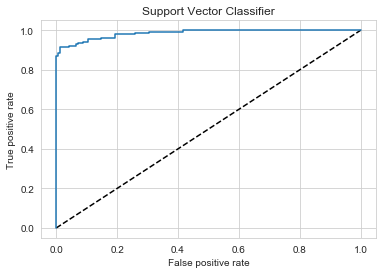

In [108]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Support Vector Machine')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Support Vector Classifier')
plt.show()

# Saving the model

In [109]:
import joblib
joblib.dump(svm,"svm_insurance_claim.obj")

['svm_insurance_claim.obj']